<a href="https://colab.research.google.com/github/aleguma/tf-cert/blob/main/08_NLP_fundamentals_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to **natural language processing (NLP)** with TensorFlow!

Natural language processing (NLP) is a very exciting technology that involves extracting information out of natural language.

If this sounds quite broad, it's because it is.

Imagine being able to:

* Classify different kinds of Wikipedia articles
* Generate new sequences of text (such as poems or blog posts)
* Recognize speech from voice assistants

Basically anywhere there's natural human language (speech or text), you can use NLP techniques. That's not all. Deep learning has changed the game over the last couple of years. It's now widely used across many different NLP tasks such as Search Engines, smart speakers, autocorrect (though it has some improvement to do here) and more.

## What is an NLP or natural language processing problem? (and NLU...natural language understanding)

Examples of NLP problems (NLP includes usually NLU, as it is a broader term)

* **Classification** problems such as tag generation for Wikipedia articles, e.g., "What tags should this article have? Machine learning, Representation learning, Artificial Intelligence would be of application for Deep learning article (multiple label options per sample; **multilabel classification**).

* **Text generation** (e.g., Shakespeare text) 
  * Before...http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
  * More recent models...https://openai.com/blog/gpt-3-apps/ and examples https://machinelearningknowledge.ai/openai-gpt-3-demos-to-convince-you-that-ai-threat-is-real-or-is-it/. 

* **Machine translation** (sequence to sequence problem) which involves translating a text from one language to another (e.g., Google Translator).

* **Voice assistants** (convert the sound wave into text and then find meaning of derive information out of that text).

All these problems are also referred to as **sequence problems**.

**NLP problems are basically on how to derive meaning out of text or speech or some form of sequence data.**







## Sequence problems typology

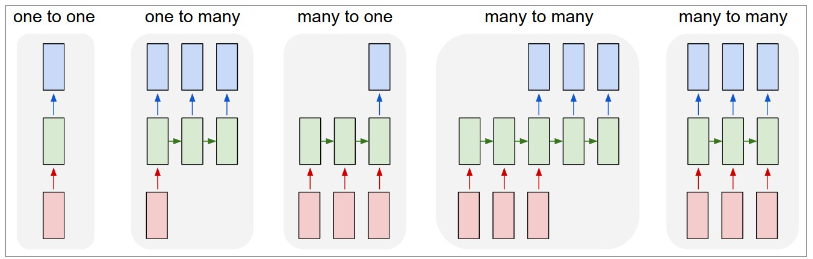

The previous image, extracted from Karpathy blogpost (http://karpathy.github.io/2015/05/21/rnn-effectiveness/) shows the types of sequence problems that we can encounter.

* **One to one**: one sequence to one output.

* **One to many**: one sequence has many outputs.
  * E.g., **image captioning** (image as input and caption/text as output).
* **Many to one**: many sequences result in one output.
  * E.g., **sentiment analysis** (input is text and output is the sentiment (positive or negative) extracted from the analyzed text.
  * E.g., **time series forecasting** (input might be the historical price of something and the output is the next timestamp's price). This is sequence but not NLP problem.
* **Many to many** (which can be synchronized or not).
    * E.g., **machine translation** (not synchronized; input is a sequence of text in one language and output is another sequence of text in another language).

In NLP, words are usually referred as **tokens** as well. We will see this and more terms soon.

## What we are going to cover (broadly)

* Downloading and preparing a text dataset.
* Learn how to prepare text data for modelling (**tokenization and embedding**).
* Setting up multiple modelling experiments with **recurrent neural networks** (RNNs).
  * RNNs are usually the way to go for working with sequences, just as CNNs are for image data.
* Building a text **feature extraction model using TensorFlow Hub**.
* Finding the most wrong prediction examples (it is a really good way to inspect how the model is performing).
* Using a model we have built to make predictions on text from the wild (the real test for any model that you build is with data from the wild).

## NLP inputs and outputs

We start with text/sequence data that gets numerically encoded (tokenization + embedding) so we transform the string/text data into numbers/tensors. Just as we did with images, transformed into tensors. 
  * Tokens are words or separate pieces of a sequence.
  * The words will have their tokenized/embedding representations.

This numerically encoded data is used as input for a machine learning algorithm (often already exists, if not, we can build one for our purpose).

From that model, we have the outputs, that depending on the problem can be of one type or another. For instance, in classification we would be predicting for instance if a tweet is political or not. The predicted output comes from learning, when the ML model is exposed to lots of examples of actual outputs.

The model will find patterns in the numerical encoding of the data that leads to the output. 

So, for a text classification example, what would be the **input and output shapes**?

* **Input**: the word sequence data gets represented as a tensor/embedding and the shape of the input is [batch_size, embedding_size], which could be, for instance, [None, 512] or [32, 512] where the embedding space shape would be of 512. The actual values will vary depending on the problem you're working/what embedding style you use. But, in general, the input shape is a 2D-tensor. As we saw before, 32 is a very common and good batch size.
  * The larger the embedding size, the more numbers the model is going to use to represent the input text data. A common embedding size ranges from 64-128-256-512. Multiples of 8 usually as a rule of thumb in ML and GPU computing is that you have your inputs or tensors in multiples of eight.

* **Output**: depends on the actual problem we are working on, but usually a 1D-tensor (vector) of prediction probabilities (in this case) of size X (where X refers to the number of classes predicted).

The models we are going to build for mapping these inputs to outputs are going to be RNNS, CNNs (you can also use convolutional nets for sequences) and feature extractors! Models can also be reused if they already exist for a particular problem we are working on!


## Steps in modelling with TensorFlow

1. Get data ready (turn into tensors)
  1. Turn all data into numbers (neural nets can't handle text/natural language)
  2. Make sure all of your tensors are the right shape (pad sequences which do not fit into batches, as all of the tensors must be of the same shape)
2. Build or pick a pretrained model (to suit your problem) from TensorFlow Hub.
3. Fit the model to the data and make a prediction
4. Evaluate the model (by comparing predictions with the ground truth)
5. Improve through experimentation (increasing complexity; increasing layers, increasing humber of hidden units, etc.)
6. Save and reload your trained model (so we can use it elsewhere)


## What is a Recurrent Neural Network (RNN)?

In very brief and naive way, they are neural networks that are very good to deal with data that has an order or temporal ordering within them.

Check these resources to learn more:

## Typical architecture of an RNN

* **Input text(s)**: target texts/sequences you would like to discover patterns in
  * Typical values: Whatever you can represent as text or a sequence.

* **Input layer**: takes in target sequence  (dtype = string)
  * Typical value: input_shape = [batch_size, embedding_size] or [batch_size, sequence_shape]

* **Text vectorization layer**: maps input sequences to numbers (e.g., word-level or character-level tokenizers, where every word/char would be converted into a number, respectively)
  * Typical values: multiple, can create with `tf.keras.layers.experimental.preprocessing.TextVectorization`

* **Embedding**: turns mapping of text vectors (tokenized chars/words) to embedding matrix (representation of how words relate, enables the model to capture the relationship between words)
  * Typical values: multiple, can create with `tf.keras.layers.Embedding`
  * E.g., word2vec, read this: https://kawine.github.io/blog/nlp/2019/06/21/word-analogies.html

* **RNN cell(s)**: layer/s to find patterns in sequences
  * Typical values: `SimpleRNN`, `LSTM`, `GRU`

* **Hidden activation**: adds non-linearity to learned features (non-straight lines)
  * Typical value: Usually, Tanh (hyperbolic tangent) (`td.keras.activations.tanh`) (for CNNs it was ReLU).

* **Pooling layer**: reduces the dimensionality of learned sequence features (usually for Conv1D models and not for RNN-based models)
  * Typical values: Average (`tf.keras.layers.GlobalAveragePooling1D`) or Max (`tf.keras.layers.GlobalMaxPool1D`)

* **Fully connected layer**: further refines learned features from recurrent layers
  * Typical values: *tf.keras.layers.Dense`

* **Output layer**: takes learned features and outputs them in shape of target labels
  * Typical values: output_shape = [number_of_classes] (e.g., 2 for Spam, not Spam)

* **Output activation**: adds non-linearities to output layer
  * Typical value: `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` (multi-class classification)

The compilation and fitting steps are really similar to the ones used for CNNs, as we will see later on.

**Note**: There are almost an unlimited amount of ways you could stack together a recurrent neural network.

Check EXTRA-CURRICULUM for more interesting knowledge on this matter. READ ALL ARTICLES/DOCUMENTATION in the following link: https://github.com/mrdbourke/tensorflow-deep-learning#-08-introduction-to-nlp-natural-language-processing-in-tensorflow-extra-curriculum

Without further ado...let's code!

# Introduction to NLP fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences, text or speech). 

Another common term for NLP problems is sequence to sequence problems (seq2seq). And, as we have seen above, there are many types (e.g., many to many, one to many, etc.)

## Check for GPU

In [1]:
!nvidia-smi -L 

GPU 0: Tesla T4 (UUID: GPU-d8415b5a-8382-9648-30b6-f211f89194a4)


In [2]:
# Or a more verbose output
!nvidia-smi

Fri Oct 14 07:32:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get helper functions

This functions were coded several times previously, but we grouped them into a library for better reuse of the functions

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-10-14 07:32:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-14 07:32:19 (76.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster). So, binary classification and prediction of text tweets referencing a real disaster or not a disaster.

See the original source here: https://www.kaggle.com/competitions/nlp-getting-started/

In [5]:
# Get the dataset from GitHub repository, it is exactly how it comes from Kaggle
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data 
unzip_data("nlp_getting_started.zip")

--2022-10-14 07:32:22--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 142.250.81.208, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-10-14 07:32:22 (97.5 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [6]:
# Unzipping we get 3 files: train.csv, test.csv and sample_submission.csv
# train.csv and test.csv are the training and testing datasets
# sample_submission.csv is an example of how Kaggle would expect a solution to be formatted for this competition

## Visualize a text dataset: getting familiar and become one with the data

After retrieving the dataset, the next step is to become familiar with the data, and the best way to do that is to visualize it! That is the data explorer's motto: *visualize, visualize, visualize*!

It is different to visualize a text dataset, but the main principles as in the image dataset remains, we try to get our idea of the data, a mental model (conceptualization of how the data looks like), before actually building the machine learning model.

So we want to answer things like: what are the examples? how does a sample looks like? what are the labels for those examples? etc.

To visualize our text samples, we first have to read them in. One way to do so would be to use Python: https://realpython.com/read-write-files-python/

But I prefer to get visual straight away. So, another way to do this is tu use Pandas...(we will not always be able to do this, as it typically requires the dataset to fit in memory). In our case, this is not a very big dataset and will fit without issues in the 12Gb RAM of Colab. However, if you have a larger dataset, you have to look for other options such as: https://www.tensorflow.org/tutorials/load_data/text 

Recommended reading: https://www.tensorflow.org/tutorials/load_data (and all the load data articles there!).



In [7]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# The main ones we care are: text and target columns.
# The text is the text from the tweet
# The target is the target label. In this case, 1 is the positive class, which refers to disaster, and 0 is the negative class, or not disaster

In [9]:
# Get some example of text
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [10]:
# So what we will be trying to do is to use the text here to predict the target
# The ideal model would predict disaster for the previous tweet.

In [11]:
# Shuffle training dataframe - it is good practice to shuffle all data as long as it is not sequential data!
# So we ensure the model is not learning any order from the data
train_df_shuffled = train_df.sample(frac=1, random_state=42)  # shuffles all the dataset (in reality it just randomly selects examples from the whole dataset); we set random seed for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [12]:
# Cool! Now we see all training data has been mixed!
# Let's continue...

In [13]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [14]:
# Very similar to the train dataset, but ofc, there are no targets
# So Kaggle has already split the data into train/test, one of the most important steps in a ML project
# With the test set we are going to use the text data here, to predict the target column

In [15]:
# How many examples of each class are there? This will tell us if the dataset is balanced...
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [16]:
# So the dataset is about 60/40 split, with more non-disaster (0) data than disaster (1)
# Quite close to 50-50, so a pretty well binary balanced dataset

If the dataset would be imbalanced, we could use methods to balance the data or change our modeling. Check out this resource: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

Here we are going to use a similar workflow as in the guide, it only adds or changes some stuff if the dataset is imbalanced to help with that issue.

In [17]:
# So remember that for any ML problem, it is important to know what are your inputs, and what are your outputs
# In our case, text is the input and target is the output! That is their relationship!
# Then it is a matter of bridging the gap between inputs and outputs using some kind of ML algorithm
# Let's continue exploring...

In [18]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [19]:
# About 10000 samples, with about 70% training data and 30% test data

In [20]:
# Let's visualize some random training examples (random is better than sequentially to avoid bias in getting familiar with the data)
# Visualizing lots of random samples increases the chances to get a better overview of the whole dataset
import random

random_index = random.randint(0, len(train_df)-5)   # create random indexes not higher than the total number of samples (and as we are going to retrieve 5, we do not want to exceed the end of the dataset, that is why we subtract 5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():   # get 5 samples from the shuffled dataset (based on an initial index retrieved from above), but only retrieving text and target columns. Itertuples is a method for turning values in a dataframe into tuples
  _, text, target = row  # underscore for the index, as we do not care about it and will always be provided
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)") # Added some logic to print more informative message
  print(f"Text:\n{text}\n")   # new line so it gets a bit prettier
  print("---\n")

Target: 0 (not real disaster)
Text:
That was the l9udest thunder I've  ever heard

---

Target: 0 (not real disaster)
Text:
On the freeway to Africa til I wrecked my Audi

---

Target: 1 (real disaster)
Text:
Fire hazard associated with installation of non-compliant external cladding on http://t.co/bTPQdehl3p - By @www.cbplawyers

---

Target: 0 (not real disaster)
Text:
New doco tonight at 9pm Setanta Sports Ireland freeview. The largest police presence at a soccer game in Ireland stop prevent the rioting

---

Target: 0 (not real disaster)
Text:
Only one commodity has escaped the total collapse in prices http://t.co/4HngTKDQMv #business

---



In [21]:
# The value of exploring the data is not only to get familiar with it, also to spot some incorrect labelling
# And also to get a grasp of where errors might lie and later on we will see where our model may find errors in our dataset
# Visualize at least 100 samples and get familiar with it, so you can get a good idea of the data we are going to work with!

### Split data into training and validation sets

The test dataset provided does not have labels, so we do not have labels to compare to. For that reason, we are going to create a validation dataset from the training dataset so we can see how the model performs on unseen data while the model is training.

In [278]:
from sklearn.model_selection import train_test_split
# We are going to use this function to split the training set into validation and training datasets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [279]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),  # it expects data in numpy array format
                                                                            train_df_shuffled["target"].to_numpy(),  # same for labels
                                                                            test_size=0.1,   # so 90-10 split, in this case 10% validation data, 90% training data
                                                                            random_state=42)  # to have all the same results, but usually is left completely random, but we want reproducibility for this example                                                        

In [280]:
# Check the lenghts
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [281]:
# Wonderful! The training dataset has been split into training and validation in 90-10 proportion!

In [282]:
len(train_df_shuffled)  # original training dataset

7613

We will agian visualize some samples, after the split. We always want to become one with the data just to make sure about the things we are feeding into our model. So, if our model produces some sort of weird outputs, we want to at least know that we have inspected our data so the weird outputs should not be expected from our model, and maybe there is something wrong with the model, not necessarily with our input data.

In [283]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [284]:
# Great, so we see we have two arrays that one line up with the other, so good!
# So we have become one with the data and created the needed datasets, all seems ready to build the model but...
# Not yet! The text data is still in text form and before building the model we need it in numeric form (as our labels are)
# So let's deal with that next!

## Converting text into numbers

When dealing with a text problem, one of the first things you will have to do before you can build the model is to convert your text to numbers. So, before building the model and feeding the data into the ML algorithm, we need to convert the text into numbers, into some kind of numerical representation.

There are a few ways to do this, namely:

* **Tokenization** - direct mapping of token (a token could be a word or a character) to number.
* **Embedding** - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned). 

**Tokenization** vs **Embedding**

**Tokenization**: word-level tokenization maps a word with a number. We could do this directly (with integer numbers, e.g., I love Tensorflow could be 0 1 2 (I = 0, Love = 1, TensorFlow = 2, etc.)) or using one-hot encoding for words ([1, 0, 0], [0, 1, 0], [0, 0, 1], ...); which would require a one-hot encoding for every word in our vocabulary. So the one-hot encoding, depending on the amount of words in the corpus, would create a very large dimensional vector, which might not be really ideal.

In any case, tokenization is just the direct mapping from word to number. There are other forms of tokenization such as character to number.

**Embedding** is another way of numerical encoding, where every word gets turned into a vector. The beautiful thing about an embedding is that you can define the size of these vectors (e.g., 3-dimensional vector or 512-dimensional vector representation, you choose).

So, basically...

**Tokenization** is a straight mapping from token to number (can be modelled but quickly gets too big, especially using one-hot encoding), while an **embedding** is a richer representation of relationships between tokens (you can limit and decide the size of the embedding vectors and it can also be learned, as it is basically a weight matrix, thus becomes a layer in our neural network that can be learned. So how each token gets represented gets updated as the neural network trains, whereas tokenization is static, is just a direct mapping). In an **embedding**, the neural network also learns how to best represent our data, it gets updated as the neural network learns more and more, whereas in tokenization the basic building blocks of a sequence stay the same. Also with embedding you can represent a whole sentence as a vector (we will see more later) and **use pre-learned embeddings**, so you do not have (but you can) create your own embedding. 

Embeddings are great as they become part of the model as a layer, so it can be updated as the model learns, to create a better representations of the tokens in our data. Intuitively, a larger embedding vector captures more information. 

Read a more detailed explanation here: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb (see section **Converting text into numbers**).

**What tokenization shoild I use? What embedding should I choose?** It depends on the problem and you may be even try to stack them! (see previous url for more). Some well-known pretrained embeddings are **[Word2vec](http://jalammar.github.io/illustrated-word2vec/)**, **[GloVe](https://nlp.stanford.edu/projects/glove/)** and many of the options available in [TensorFlow Hub](https://tfhub.dev/s?module-type=text-embedding)!

Read all that content and the extra-curriculum one (at the end of this Notebook). Very interesting topic!



### Text vectorization (tokenization) in TensorFlow

So we have to map our data to some numerical representation.

There is a wonderful layer/class in TensorFlow called `TextVectorization`. Read the documentation here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization.

Briefly, within the layer, the processing of each example contains the following steps:

1. Standardize each example (usually lowercasing + punctuation stripping)
2. Split each example into substrings (usually words)
3. Recombine substrings into tokens (usually ngrams, that is, groups of n tokens)
4. Index tokens (associate a unique int value with each token)
5. Transform each example using this index, either into a vector of ints or a dense float vector.

In [285]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Remember, any sequence problem will require the encoding of the sequence data in some numerical form
# Vectorization is usually one of the first steps

# Using the default TextVectorization parameters - this is just an example and explanation of the default values, the real example is 3 cells below!
text_vectorizer = TextVectorization(max_tokens=None,  # Defines how many words are in the vocabulary; if NONE, there is no cap/limit on the size of the vocabulary; so the class will figure out itself how many words will encomprise the vocab. 
                                                      # It will automatically add <OOV> (out of vocabulary token), which would be used as token for the words that exceed the vocabulary size (if set), which are usually not common/frequent ones
                                    standardize="lower_and_strip_punctuation",   # lowercase the text and remove the fluff, things that do not really contribute to figure out the target
                                    split="whitespace",  # what is used to split the sequences, in this case, the white space or space between the tokens
                                    ngrams=None,  # to create groups of n-words. We are not going to set it for now, we are going to leave its token on each own and not work with groups
                                    output_mode="int",  # how to map tokens to numbers- tf-idf is a relevant one, we will use it later!
                                    output_sequence_length=None)  # the texts are of different sizes and the ML model needs all to have the same length (similar to batches for CV), so all have to be as long as the longest one is. It pads (with zeroes) each sequence automatically to the longest sequence. So this basically allows defining or limiting how long the sequences can be.
                                    #pad_to_max_tokens=True)  # padding with zeroes to the maximum token length, which, if not defined in the parameter above, it is retrieved automatically as the longest from the text data // it can be only set to True if max_tokens is defined

In [286]:
# Let's work with real numbers instead of default values (above), so we have to retrieve some information like
# What is the size of a tweet?
len(train_sentences[0].split())

7

In [287]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [288]:
# Setup text vectorization variables - real example of TextVectorization! 
max_vocab_length = 10000   # max number of words to have in our vocabulary
max_length = 15   # max length our sequences will be (e.g., how many words from a tweet will the model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,   # use most common 10000 words only (value set for max_vocab_length)
                                    output_mode="int",   # convert them into integers
                                    output_sequence_length=max_length)  # truncate or pad all sequences to max_length, which is 15 tokens in this case

In [289]:
# Next step is to map this text vectorizer or "adapt" it to our training data
# So that every token in our training sequences will get mapped to some form of integer

# Fit the text vectorizer to the training text, so we can convert our text data into numeric data that we can pass to our model
text_vectorizer.adapt(train_sentences)  # "adapt" the text vectorizer instance to our training data only (validation and test data correspond to the future, so they are not used to adapt or build the model data!)
                                        # we can pass the data in several formats. Our data is in list of strings, which is a supported format for the tokenizer

In [290]:
# Once it is fit, let's check it
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"

text_vectorizer([sample_sentence])  # we pass it as a list, as it is one of the supported and expected formats

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [291]:
# Awesome! The shape here is one, because we just passed one sentence; and 15 is the max_length or max number of tokens per sentence!
# We can see in the array the tokenized version of the sample_sentence; the 0s at the end is to make sure that the total sentence length is 15, as the original is shorter (padding)
# If it would be longer, it would be truncated (cut) in the 15th token and no pad needed
# We limit all the sentences to be the same length so they can be converted efficiently into numbers and equal-sized data batches!

In [292]:
# Let's continue checking the vectorizer to understand how it works...
# Choose a random sentence from the training dataset and tokenize it (part of becoming one with the data)
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence} \
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 Detonation fashionable mountaineering electronic watch water-resistant couples leisure tabÛ_ http://t.co/UCAwg59ulJ http://t.co/eNqDfbJUMP         

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 580, 3859, 3610, 2128,  135, 3258, 3083, 3681, 3358,    1,    1,
           0,    0,    0,    0]])>

In [293]:
# How many unique words (max_tokens parameter) the text vectorizer has found in the training sentences?
# Get the unique words in the vocabulary; this can also help us to remap the sentences in numeric form back to text form
words_in_vocab = text_vectorizer.get_vocabulary()   # get all of the unique words in our training data
top_5_words = words_in_vocab[:5]  # get the 5 most common words
bottom_5_words = words_in_vocab[-5:]  # the 5 least common words
# This is also another form of becoming one with the data
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [294]:
# As we set the maximum words in vocab is 10000, then it reached that number, which we fixed beforehand
# [UNK] is unknown token; which refers to data not included in the vocab (out of this 10000 words), which is actually the OOV token
# As the vocab is kind of small, not common words (not included in the 10000), many words get assigned the [UNK] token, so it is fine
# If we increase the vocab size, to for example 20000, we may have less words assigned to the [UNK] token, as we would increase the text_vectorizer capacity to handle different types of words

So we have just created a tokenizer, we have a way to convert our text into numerical form. We have built a tokenization layer, mapping words to integers. How can we create an embedding, which has the advantage of being learned? So, instead of assigning statically a token to a number, it actually learns and modifies through learning, trying to find the best numerical representation for a word in the data.

Let's create an embedding...

### Creating an Embedding using an Embedding layer

TensorFlow has plenty of layers and classes for machine learning and deep learning, including embedding layers. To make our embedding, we are going to use TensorFlow's embedding layer. An embedding is a rich numerical representation of words which can be learned during training. Read the documentation here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

According to the documentation, an **embedding layer** `turns positive integers (indexes) into dense vectors of fixed size`.

A dense vector (1D-tensor) captures the relation, with each dimension providing relevant information. Dense vectors are much more information-rich with densely-packed information in every dimension, as opposed to sparse vectors, which are sparsely populated with information. Typically we would be looking at thousands of zeros to find a few ones (our relevant information). Consequently, these vectors can contain many dimensions, often in the tens of thousands. However, sparse vectors are easier to compress and store in memory.

The initialization of the word embedding matrix will be random and it will be updated through the learning process to better suit the order or representation of words. As any other layer with weights, the values improve as our model trains. 

The parameters we care most about for our embedding layer:

* `input_dim` = the size of our vocabulary (this is why we had to look into our vocabulary before). The embedding wants to know how many words are in the vocabulary.
* `output_dim` = the size of the output embedding vector (e.g., a value of a 100 would mean each token gets represented by a 100-dimensional vector).
* `input_length` = length of the sequences being passed to the embedding layer (e.g., we limited before the sequences to be 15 token long).



In [39]:
# Let's create the embedding layer
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,  # set input shape
                             embeddings_initializer="uniform", # this is how the embedding matrix gets initialized using random values (uniform distribution in this case)
                             output_dim=128,  # output shape; usually NN (especially when using GPUs) work very well with numbers that are divisible by eight. This is the reason multiples of eight are used in many parameters (e.g., batch sizes of 32, etc.). If you want to speed up training, multiples of 8 are always a good choice.
                             input_length=max_length)  # how long is the input
embedding

In [40]:
# Now let's check it!
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence} \
        \n\nEmbedded version:")

# Embedding the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))    # we have to convert first the plain text into numbers to pass it through the embedding layer; as the embedding works with integers (indexes) not with string data
sample_embed

Original text:
 Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb         

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04170935, -0.03434143, -0.03387215, ...,  0.01326302,
          0.02223365, -0.0438894 ],
        [-0.01657359, -0.01127602,  0.02178086, ..., -0.00234484,
         -0.01294516, -0.01546879],
        [-0.01663133,  0.01026306,  0.01219015, ..., -0.02272434,
         -0.03976449,  0.01168474],
        ...,
        [ 0.01333579,  0.02744665,  0.04569617, ..., -0.03127656,
         -0.00669882, -0.02984834],
        [ 0.01333579,  0.02744665,  0.04569617, ..., -0.03127656,
         -0.00669882, -0.02984834],
        [ 0.01333579,  0.02744665,  0.04569617, ..., -0.03127656,
         -0.00669882, -0.02984834]]], dtype=float32)>

In [41]:
# Notice the shape of the embedding! 1 sequence, 15 tokens (fixed-length, padded or trunacted) and 128 dimensions per token (i.e., 128-dimensional vector per token)

So now we have a way to go from word to numerical mapping or positive integer mapping to now dense vector representation with the embedding layer.

Let's continue exploring the embedding...

In [42]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence.split()[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-4.1709352e-02, -3.4341432e-02, -3.3872150e-02, -2.4513138e-02,
         1.9867349e-02, -3.6125891e-03, -3.2958984e-02,  3.2813851e-02,
         2.8713908e-02, -1.0887731e-02,  4.3275211e-02, -1.5735589e-02,
         3.3409867e-02, -1.0388590e-02, -3.1681824e-02,  3.0021254e-02,
        -4.3890357e-02,  6.5918677e-03,  4.9188558e-02, -4.2550452e-03,
        -2.3557091e-02, -1.0244418e-02, -2.4434615e-02,  5.7168603e-03,
         3.0213382e-02,  3.1916264e-02,  3.5453979e-02,  2.6622508e-02,
         2.1699443e-03,  4.9290959e-02, -2.1280397e-02, -2.7331520e-02,
         4.3225598e-02, -1.9162441e-02, -3.2675602e-02, -3.0851794e-02,
         4.0735316e-02, -1.7932929e-02,  6.9970489e-03,  4.7440853e-02,
         3.6712956e-02, -2.9075289e-02,  1.6710330e-02,  3.5989393e-02,
         4.9579147e-02, -2.2480024e-02,  1.6255382e-02, -6.5845251e-03,
         1.9728627e-02, -2.0361995e-02,  2.8236482e-02,  3.1496000e-02,
        -2.9353

In [43]:
# Initially, all these numbers are going to be random, but as we train, they are going to be update and refined to better represent each token and its relation to other tokens
# So the first tensor (128-dimensional vector) is the embedding of the first word/token
# The second value is the shape of the tensor (vector of 128 dimensions)
# The last value is the word/token that is embedded by the first 128-dimensional tensor! (Here the value is quite random as there has not been much learning by the layer)

All we have done up to now are very important steps in many NLP problems (i.e., text factorization or tokenization, which is converting words into some numerical format and then creating an embedding is making that mapping numerical format learnable).

After discussing how to convert sequences into numerical encoding, it is time to start running some modelling experiments...

## Modelling a text dataset (running a series of experiments)

Now we have  got a way to turn our text sequences into numbers. It is time to start building a series of modelling experiments. We will start with a baseline and move on from there. 

A common baseline for DL models is to build a non-DL model, which in our case will be a Naive Bayes model. Often, before using deep learning, you will use an algorithm from scikit-learn to build a baseline, before building deeper, more complex models.

How do know what method to use for the baseline? This is a very good resource to know: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html (read it and use it!). Scikit-learn is focused on ML in general, not DL; and it is an awesome ML API (TF/Keras were inspired by scikit-learn API to build their API).

Remember the ML practictioner motto...*experiment, experiment, experiment*...We are going to run the following experiments:

* Model 0. Naive Bayes with TF-IDF encoder (baseline). This is from [Sklearn ML map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).
* Model 1. Feed-forward neural network (dense model)
* Model 2. LSTM model (RNN)
* Model 3. GRU model (RNN)
* Model 4. Bidirectional-LSTM model (RNN)
* Model 5. 1D Convolutional Neural Network (CNN)
* Model 6. TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7. Same model as 6. TensorFlow Hub Pretrained Feature Extractor but with just 10% of training data (to understand the power of transfer learning even more, on a variety of different problems).

Remember, it is always important when you do some modelling experiments to start with some kind of baseline. A very common baseline to build any kind of text data set is a Naive Bayes model with scikit-learn with TF-IDF encoder. TF-IDF stands for Text Frequency - Inverse Document Frequency (see more here: https://monkeylearn.com/blog/what-is-tf-idf/), which is another way of representing text as numbers. Then we are going to build a dense model on top of our text factorization and embedding layers. After we will run three series of models that will be our first recurrent neural networks (RNNs): LSTM (Long Short-Term Memory), GRU (Gated Recurrent Unit) and Bi-LSTM. Then we will see how to use a 1 dimensional CNN for sequence data. Lastly, we will look at TensorFlow Hub for pretrained feature extraction models, and see how can we use transfer learning with natural language processing (using more and less data available for our model). 

If you have a relatively small dataset, it is always good to create a baseline of course, but then use transfer learning, which is probably going to leverage some of the best results you will find. 

How are we going to approach all these experiments?

We are going to use the standard steps in modelling with TensorFlow (check for the full description the Section above called *Steps in modelling with TensorFlow*). 

* Create a model
* Build the model
* Fit the model
* Evaluate our model


### Model 0: Getting a baseline

As with all machine learning modelling experiments, it is important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we will use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words into numbers.

> **Note**: It is common practice to use non-DL algorithms as a baseline because of their speed, and then later using DL if you can improve upon them.

Sklearn is the best library out there for Python traditional ML algorithms. Use Sklearn try to beat the ML models' results using DL algorithms. It is common to practice with these non-DL algorithms because of their speed.

We are going to generate one of those models next...

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer   # a way to turn text into numbers using TF-IDF formula
from sklearn.naive_bayes import MultinomialNB    # ML model
from sklearn.pipeline import Pipeline   # amazing feature of Sklearn to create pipelines

# The same steps apply as in TF, we need to get the data ready (numerical format) -> TF-IDF formula in this case
# Then build a model or pick a pre-trained model -> Naive Bayes algorithm in this case to fit our model

# Create tokenization and modelling pipeline
model_0 = Pipeline([   # pipeline is like a Keras Sequential model, it says do this steps in order...it takes a list of tuples; the first is the name of the step and the second is the actual function to execute!
    ("tfidf", TfidfVectorizer()),  # convert words into numbers using TF-IDF
    ("clf", MultinomialNB())  # model the text
])  # so the pipeline has two steps, first converting the data into numbers and then use this to fit the model

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)   # very similar to Keras API; we pass the data and the labels; and it is done!

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [262]:
# And it is done! That is the beauty of Sklearn and using traditional ML models, they are usually a lot quicker than DL models!
# Ofc not the case for every single traditional ML model, but oftentimes large deep learning models take a fairly long time to train

In [263]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)  # this is like evaluating in TF/Keras, it is scoring our ML model (by default for a classification problem the scoring metric is accuracy)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [264]:
# That is a pretty good score, as we have an almost balanced dataset (60-40), so not bad!
# So guessing would be around 50-55%, so the baseline is doing a fir bit better than guessing
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [265]:
# This is good sign, it is an indicator that hopefully a deep learning model can learn better the dataset

In [266]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)  # predict method as in Keras, works similarly to make predictions!
baseline_preds[:20]  # see the first 20 predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [267]:
# Let's evaluate the model using other metrics, so we can compare better all the models, across a range of different classification metrics!

Let's have a brief reminder of some **common classification evaluation methods**...

* **Accuracy**: default metric for classification problems. Not the best for imbalanced classes.
  * `tf.keras.metrics.Accuracy()` or `sklearn.metrics.accuracy_score()`
* **Precision**: higher precision leads to less false positives.
  * `tf.keras.metrics.Precision()` or `sklearn.metrics.precision_score()`
* **Recall**: higher recall leads to less false negatives.
  * `tf.keras.metrics.Recall()` or `sklearn.metrics.recall_score()`
* **F1-score**: combination of precision and recall, usually a good overall metric for a classification model.
  * `sklearn.metrics.f1_score()` or `tfa.metrics.F1Score` (TF addons library, not the main one).
* **Confusion matrix**: comparing predictions to truth labels to see where model gets confused. Can be hard to use with large number of classes.
  * Custom function or `sklearn.metrics.confusion_matrix()`

As we are going to use many of these to compare our models, as it is always better to compare them from different perspectives and comprehensively, it is better if we create a function so we do not rewrite a whole bunch of evaluation code every time. Here it goes...

### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics every time, however, this will be cumbersome and could easily be fixed with a function...

Let's create one to compare our model's predictions with the truth labels using the following metrics:

* Accuracy
* Precision
* Recall
* F1-score

> For a deep overview of many different evaluation methods, see the following article of the SKlearn documentation, on how to evaluate a model properly, this is a **must read documentation** for any ML practictioner: https://scikit-learn.org/stable/modules/model_evaluation.html

In [268]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100      # we will provide the percentage value

  # Calculate model precision, recall and f1-score using "weighted" average, by the number of examples in each class, to account for label imbalance
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")  # we ignore the support variable, put the underscore to collect it in a "blank variable"

  model_results = {                 # we are going to collect all the metrics in a dictionary, which is a great data structure for comparing stuff and also convert them into DataFrames (as we will see later)
      "accuracy": model_accuracy,
      "precision": model_precision,
      "recall": model_recall,
      "f1": model_f1
  }

  return model_results       # we return model dictionary of results

In [269]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [270]:
# So now we have a function that enables us to compare the models' performance in an easier way!
# It is always recommended and very useful to functionize and group reusable code in libraries that we can reuse many times and not rewrite all the time the same code, over and over!

### Model 1: A simple dense model (first DL model for our text data)

Even though we have created for this problem a step-by-step experimental workflow, you do not have to do so much experimentation for our own problems, this is just to show an overview of what is out there. As you become more proficient with DL, you will understand what works and what does not for your own problems and then focus on designing your own experiments. So the guideline/steps provided are adaptable to your own problems and with your own experience, not anything set in stone.



In [54]:
# Create a tensorboard callback (need to create a new one for each model)
# For DL models using TF is always good to track the modeling experiments, the tensorboard callback is very helpful for doing so and then use TensorBoard or Weights & Biases to visualize/check them
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [55]:
# Build model with the Functional API (it is more customizable than the sequential API)
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)  # inputs are 1-dimensional strings (model will receive 1 sequence at a time), we could also pass "string" and this will also raise an error if the input is not a string!
x = text_vectorizer(inputs)   # convert/map the string/token sequence into numbers
x = embedding(x)   # create an embedding of the numerically encoded inputs
x = layers.GlobalAveragePooling1D()(x) # condense the one feature vector for each token (15) to a single 128-dimensional vector per sequence; to lower the dimensionality of the embedding (model does not fit if this layer is not added; as is signals a shaping issue/error)
# x = layers.GlobalMaxPool1D()(x)  # this is another layer to condense the 15 feature vectors per token to a single 128-dimensional token per sequence. We may try which one performs better, as they both condense but using different approaches (max or average value)!
outputs = layers.Dense(1, activation="sigmoid")(x)  # create the output layer; binary classification, we want binary outputs, so 1 output unit and sigmoid activation

model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")  # creation of the model

In [56]:
# Check model summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [57]:
# Very cool!
# So the sequence is numerically encoded into 15 tokens and then passes through the embedding layer
# Every embedding token gets mapped to a 128-dimensional vector, so we have 1280000 learnable parameters for the embedding as the vocab size is 10000!
# The global average pooling layer after the embedding gets rid of the 15 dimensions and condenses each token from 128 to a single 128-dimensional vector (average value), which is then used and matches the input expected by the dense layer (output)! 
# After it, we have the Dense layer that also has learnable parameters!

In [58]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [59]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences, 
                              y=train_labels, 
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20221014-073229
Epoch 1/5
215/215 [==============================] - 6s 9ms/step - loss: 0.6115 - accuracy: 0.6951 - val_loss: 0.5384 - val_accuracy: 0.7507
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4425 - accuracy: 0.8186 - val_loss: 0.4713 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3481 - accuracy: 0.8599 - val_loss: 0.4571 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2856 - accuracy: 0.8911 - val_loss: 0.4613 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2383 - accuracy: 0.9096 - val_loss: 0.4780 - val_accuracy: 0.7795


In [60]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7795


[0.4780246317386627, 0.7795275449752808]

In [61]:
# Make some predictions
model_1_probs = model_1.predict(val_sentences)
# Plot the first ten predictions
model_1_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.40724394],
       [0.7480104 ],
       [0.9976676 ],
       [0.1821287 ],
       [0.1123643 ],
       [0.9434928 ],
       [0.90566725],
       [0.9931896 ],
       [0.9694225 ],
       [0.37449852]], dtype=float32)

In [62]:
# So as it is binary classification, everything below 0.5 will be forecasted as 0 (negative class/no disaster); all above as 1 (positive class/disaster)!
# But this threshold can be adjusted according on what suits your results the best!

In [63]:
# Very important to check always input and output shapes of the model, see if they match (usually an error is thrown)
# But sometimes it is not shown, and all about deep learning is finding good data representations with the layers and matching input/output shapes!

In [64]:
# Compare predictions with ground-truth labels
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_probs))   # remove the dimension of size one from the shape of the tensor and round the probabilities to 0 or 1 (label format)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [65]:
# Before we kept the threshold, over 0.5 rounded to 1; below rounded to 0 (default rounding). We could change this according to our necessity!

In [66]:
# Now we can compare the predictions with the labels, as they are in the same format (apples to apples)
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 77.95275590551181,
 'precision': 0.7811151206076258,
 'recall': 0.7795275590551181,
 'f1': 0.7776506830100394}

In [67]:
# So not bad, how do they compare to baseline results?
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [68]:
# They are very similar, but baseline seems to be slightly better!
# Let's compare the differences
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [69]:
# So seems that our baseline model is better in all metrics to the model_1!
# So, as said before, not every experiment will work or improve the results! That is an important takeaway!
# Not all your experiments are going to come out exactly how you thought they would!
# That is the whole reason why we set multiple experiments and why we created a baseline model to begin with.

So not all experiments you run will improve previous experiments/models. So that is why the machine learning practictioners motto is *experiment, experiment, experiment*. Find out what does not work so that we can quickly find out what does though.

So let's continue with our experiments. But before continuing, let's explore a bit more what is happening with our embedding layer...

## Visualizing learned embedding

Our embedding was initialized by random numbers but they got updated/learned during training. So after some training epochs, the embedding layer will update its internal weights or internal dense vectors for each token, to try to learn a better representation of how each token should be represented.

Let's visualize the encoding...

In [70]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]    # how many words compose our vocab, and print the most common tokens

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [71]:
# Remind ourselves about the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [72]:
# So the embedding layer creates a 128-dimensional vector for every token in target sequence composed of 15 tokens

In [73]:
# Get the weight matrix of the embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for 5 epochs)
# So the patterns in our embedding layer have been updated from random to be whatever representation is now for five loops of the whole training data
embed_weights = model_1.get_layer("embedding").get_weights()  # get layer embedding by name, and then its weights
embed_weights

[array([[ 0.01068687,  0.02021748,  0.04006794, ..., -0.02510402,
         -0.01665396, -0.02217085],
        [ 0.04533691,  0.022349  , -0.01218659, ...,  0.02830005,
          0.01846683,  0.03866524],
        [-0.02412863, -0.05251316, -0.0603177 , ...,  0.00260966,
         -0.00892156,  0.02350382],
        ...,
        [ 0.01232188, -0.0386433 ,  0.00275014, ..., -0.04404798,
          0.00530453,  0.02504546],
        [-0.00418911, -0.01605401, -0.07759131, ...,  0.04560663,
         -0.0056143 ,  0.06711842],
        [-0.03999877, -0.04168094, -0.07308841, ...,  0.03517992,
         -0.0485951 ,  0.10983688]], dtype=float32)]

In [74]:
# This shows all of the learned patterns within this particular layer
# Large array or tensor of numbers that we do not really understand what is going on
# Let's put on our data explorer's hat and visualize, visualize, and visualize them

In [75]:
# What is the shape of this tensor
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)  # same size as vocab size and embedding_dim (output_dim of our embedding layer)

(10000, 128)


In [76]:
# So the embedding matrix has a slot for every token in our vocabulary (composed of 10000 tokens), which
# embedded into a 128-dimensional (or 128-dimensional length) dense vector

Now we've got the embedding matrix our model has learned to represent our tokens, which is a large array or tensor of numbers. Let's see how can we visualize it.

To do so, TensorFlow has a handy tool called **Projector**: https://projector.tensorflow.org/.

And TensorFlow also has an incredible guide on word embeddings themselves. This is a must read that can be found here: https://www.tensorflow.org/text/guide/word_embeddings.

In [77]:
# Let's use the embedding projector tool (following code from the previous guide)
# The following code is extracted directly from https://www.tensorflow.org/text/guide/word_embeddings

# Create embedding files (we got this from TF's word embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')    # create an output file for the vectors that represent each of our tokens
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')   # this is the words of our vocabulary

for index, word in enumerate(words_in_vocab):   # write the weights and words to file
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [78]:
# This piece of code outputs two files: vectors.tsv and metadata.tsv
# In Projector, word2vec is used as starting example, which is one of the original ways to represent words as vectors
# If we dive it in the graph, each of the dots is a word
# This is a 3-dimensional graph, which is obtained by using PCA to compresse the dimensionality (reduces the dimensionality from a larger dimensional space to a smaller dimensional space)
# As a humans we can't visualize or interpret 128 dimensions (the model can), but we can manage 3; so that's why it has been reduced to 3 dimensions (X, Y, Z)
# This cloud of points is our words representations in the embedding space
# The whole concept of this is that similar words should appear with similar vectors (depending on what the original set was), so close into the the embedding space

In [79]:
# Next we download the output files to our own machine so we can upload them to Projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# After downloaded, we can upload them to Projector: https://projector.tensorflow.org/ and visualize them!
# We use the LOAD option and upload both files
# It automatically reduces the dimensionality of the vector space to 3 using PCA (we can select other dimensionality reductiont techniques)
# The plot of our embedding is shown below...

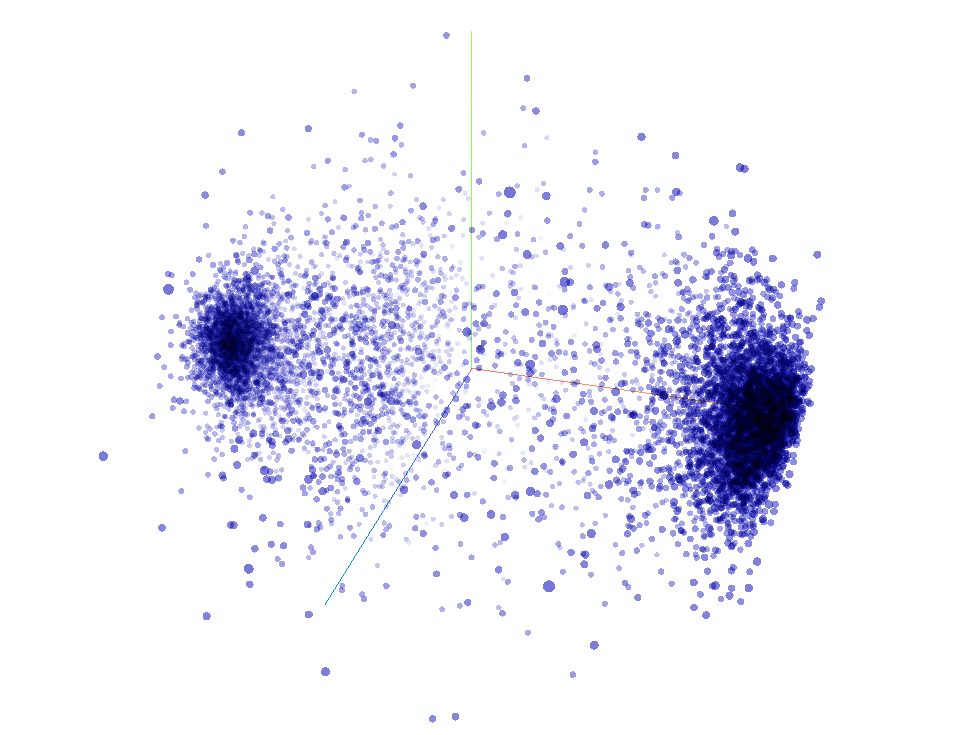

In [81]:
# This might not make sense to use, but it does for our model; is what it sees
# But this is us trying to familiarize ourselves with what is going on behind the scenes of our model
# Creating some form of embedding is behind a lot of Deep Learning models, for whatever data they use
# Our embedding seems to have to differentiated clusters...maybe some of them are more related to disaster tweets and the other to non-disasters?

Downloading the files above we can visualize them using http://projector.tensorflow.org/ and clicking the "load" button on the left hand side.

**Resources**: If you'd like to know more about embeddings, I'd encourage you to check out:

* Jay Alammar's visualized *word2vec* post: https://jalammar.github.io/illustrated-word2vec/

* TensorFlow's *Word Embeddings* guide (a must read): https://www.tensorflow.org/text/guide/word_embeddings



## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data. 

The premise of a recurrent neural network is to use the representation of a previous input (at *t-1* step) to aid the representation of a later input (at time or step *t*). (Deep Learning is also called representation learning, that is, learning useful representations of the data).

This is a very high overview of RNNs (too high). For a better understanding of them, check: 

> **Resources**: If you want a more specific overview of the internals of a recurrent neural network, see the following: 
* MIT's sequence modelling lecture: http://introtodeeplearning.com/ video on *Deep Sequence Modeling*: https://youtu.be/QvkQ1B3FBqA
* *Understanding LSTMs* by Chris Olah: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
* Andrej Karpathy's article on RNNs (*The unreasonable effectiveness of recurrent neural networks*): http://karpathy.github.io/2015/05/21/rnn-effectiveness/

### In brief: Architecture of a RNN

Standard RNN (in the case of text but is applicable to any sequence data):

**Input(s)** (some form of sequence
(e.g., text)) --> **text Vectorization layer** (converting text to numbers) --> **Embedding layer** (which all results in processed inputs, represented as a tensor) --> **RECURRENT LAYER(s)** (e.g., LSTM, GRU, Bidirectional) (which will create some form of representation/s of our inputs) --> **Dense layer** (to generate our required outputs, e.g., binary classification).

Let's start coding and build our first RNN...


### Model 2: LSTM

LSTM = Long Short Term Memory (one of the most popular RNN cells).

Our structure of an RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)


In [82]:
# Create an LSTM model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")   # input is one sequence at a time of type string
x = text_vectorizer(inputs)  # turn words/tokens into numbers
x = embedding(x)  # richer representation of our tokens mapped to numbers (vectors)
print(x.shape)  # to see the shape of the output layer from our embedding
x = layers.LSTM(units=64, return_sequences=True)(x)  # 64 is the hidden units parameter in this case, a multiple of 8 to speed up the code in GPUs; return_sequences has to be set to True when you are stacking RNNs cells together
print(x.shape)  # to see the shape of the output of the LSTM with return_sequences = True
x = layers.LSTM(64)(x)
print(x.shape)  # to see the shape of the output of the LSTM with return_sequences = False (default)
x = layers.Dense(64, activation="relu")(x)
print(x.shape) 
outputs = layers.Dense(1, activation="sigmoid")(x)  # binary classification output

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")  # create the model

(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)


In [83]:
# As we can see, the embedding layer output is one 128 dimensional vector per each token, so 15 of them
# So the first recurrent layer keeps the 15 dimension there, because we've set return_sequences = True
# So it going to return our representation of a sequence in the form of a sequence as we have set the return_sequences parameter to True
# The 64 reflects the number of units we have in the layer
# However, the next layer loses the 15 dimension, and then it is only 64
# Which is the same output as the dense layer
# So what is happening? 
# So that is something to keep in mind: when stacking RNNs together, you need to return_sequences, which by default is False (when using just one RNN layer that is a very good default!)
# When using recurrent layers, if you want to use the power of stacking them, then you have to set return_sequences=True as every RNN layer expects a 3D tensor input and outputs a 2D tensor if return_sequences=False
# If return_sequences=True, it returns a 3D-tensor output which is the needed input for another/next RNN layer, that is why when stacked, that parameter has to be True for all except the last RNN layer!
# Otherwise we will receive an input error if we try to feed a 2D-tensor to a RNN layer! Always check and be sure the input/output dimensions are correct! Otherwise an error may happen or maybe not (but poorer performance!)

To better understand the shape topic of RNNs, let's dive in into the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

As written in the documentation:

* `input`: *A 3D tensor with shape [batch, timesteps, feature]*, which in our case can be translated to [batch, # token per sequence, # feature vector]. So if we do not set return_sequences=True it outputs a 2D vector rather than a 3D vector. That is something very important to keep in mind when stacking several RNN layers.

In [84]:
# Let's rewrite the model above without the shape prints and a single LSTM layer

In [85]:
# Create an LSTM model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")   # input is one sequence at a time of type string
x = text_vectorizer(inputs)  # turn words/tokens into numbers
x = embedding(x)  # richer representation of our tokens mapped to numbers (vectors)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)  # binary classification output

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")  # create the model

In the LSTM layer there are many parameters, as in any TF layer implementation, there are default values, which are usually good *defaults* for most applications. As you get more familiar and experienced with DL you may want to change these parameters. 

We focused mainly on two of the most important ones: `units` and `return_sequences`. The default activation is `tanh`, which is the default for RNNs cells (for other layer types it was `ReLU`). 

Check: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html for a deeper explanation about `tanh` and other common activation functions in DL.

Let's continue for now...

In [86]:
# Get a summary of the model
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [87]:
# As we can see, as the LSTM layer does not have True set for return_sequences; 
# It returns a singular feature vector of size 64
# Which is used as the input for our dense layer, the output layer

In [88]:
# Compile the model - even though we are using RNNs, it is the same as for any other kind of model
model_2.compile(loss="binary_crossentropy",    # binary classification loss function
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [89]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,  # as it is a DL model we can use TensorBoard
                                                                    "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20221014-073254
Epoch 1/5
215/215 [==============================] - 6s 9ms/step - loss: 0.2260 - accuracy: 0.9242 - val_loss: 0.5746 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1558 - accuracy: 0.9428 - val_loss: 0.6061 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1306 - accuracy: 0.9514 - val_loss: 0.6371 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1030 - accuracy: 0.9606 - val_loss: 0.7446 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0881 - accuracy: 0.9670 - val_loss: 0.8940 - val_accuracy: 0.7769


In [90]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]  # checking first 10

24/24 [==============================] - 0s 3ms/step


array([[2.6672841e-03],
       [6.9906491e-01],
       [9.9953258e-01],
       [9.4304293e-02],
       [6.2998285e-04],
       [9.9643338e-01],
       [4.6826804e-01],
       [9.9972206e-01],
       [9.9945801e-01],
       [2.6306880e-01]], dtype=float32)

In [91]:
# Convert model_2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))   # remove dimension of size 1 and round the pred probs to get labels
model_2_preds[:10]  # checking first 10, so they are in the same format as val_labels; so we can compare them

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [92]:
# Calculate model_2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'precision': 0.7822241302284023,
 'recall': 0.7769028871391076,
 'f1': 0.7734519762210931}

In [93]:
# We have the results of model_2, let's see how were the baseline results...
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [94]:
# Again our baseline model is better!
# This shows the importance of running a baseline model!!
# Maybe adding some more LSTM layers, stacking them, and adding another dense layer will improve the results
# But as we want to keep our models as simple as possible in these round of experiments covering RNN concepts
# And different models with RNN layers...
# Then that's it for LSTM! Let's move to the next RNN model, using GRU!

In [95]:
# This model is pretty much the same as the LSTM model, but just using a GRU layer instead of an LSTM layer!
# Let's build it and see if, for the first time, we can beat the baseline results!

### Model 3: GRU

Another popular and effective RNN component is the *Gated Recurrent Unit* or GRU. 

The **GRU cell** has similar features to an **LSTM cell** but has less parameters. The term cell is used equivalently for layer. 

Documentation concerning GRU: https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU

Great resources to understand GRUs: 

* https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be
* https://en.wikipedia.org/wiki/Gated_recurrent_unit


In [96]:
# Built an RNN using the GRU cell
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)  # inputs are string sequences, given one at a time
x = text_vectorizer(inputs)  # convert tokens/words into numbers
x = embedding(x)  # richer representation of tokens using dense vectors
x = layers.GRU(64, return_sequences=True)(x)   # as for LSTM, if you want to stack recurrent layers on top of each other, you need return_sequences=True
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [97]:
# RNNs expect as input 3D tensors [batch, timestamp, feature], so we need to return_sequences=True when we stack them
# When we set that, they return also the same format, otherwise they returns [batch, feature]
# Remember RNNs deal with sequential data, using the input of previous inputs to feed into inputs ot subsequent inputs
# Input/output shapes are usual errors when building neural networks, this is specially sensitive here with RNNs
# We have to be sure when we stuck them that we are feeding the expected input and getting the matching output, that is
# what return_sequences ensures when stacking. That is why we use return_sequences in all except the last one!

In [98]:
# After trial of combination of several RNNs and building them with no issue, let's build the one we
# really want, that is the one with just a single GRU layer
# In this case the return_sequence is set to False as the expected (and good input) for the output layer
# Is a 2D-tensor (one vector per the entire sequence) and not a 3D-tensor (one vector per token). 
# Otherwise we may run into trouble (have one pred prob per every token) or have shape error (most likely a mismatch error)
# CONNECTING NOTION: That very same thing is what GlobalAveragePooling1D() did for us in model_1, 
# condensing the 3D-tensor into a 2D so the shape matched
# So if we would put here return_sequences=True in the GRU and then an GlobalAveragePooling1D() it would work!
# It would basically get the same shapes (condensing from 3D to 2D, a single vector per sequence) as if we 
# run the model with return_sequences=False!! Providing a pred prob per sequence and not per token!! 
# Awesome!! There are multiple ways to build neural nets, some better than others, 
# but concepts can be combined!! # Anyway, let's build the single GRU model...

In [99]:
# Built an RNN using the GRU cell
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)  # inputs are string sequences, given one at a time
x = text_vectorizer(inputs)  # convert tokens/words into numbers
x = embedding(x)  # richer representation of tokens using dense vectors
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [100]:
# Get the summary of the model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [101]:
# Compile the model
model_3.compile(loss="binary_crossentropy",  # binary classification
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [102]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20221014-073307
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.1542 - accuracy: 0.9381 - val_loss: 0.7557 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0837 - accuracy: 0.9679 - val_loss: 0.9034 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0697 - accuracy: 0.9743 - val_loss: 0.9608 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0601 - accuracy: 0.9747 - val_loss: 1.1016 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0533 - accuracy: 0.9765 - val_loss: 0.9407 - val_accuracy: 0.7651


In [103]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[2.4956655e-02],
       [7.4619305e-01],
       [9.9970967e-01],
       [1.6154991e-01],
       [3.3481058e-04],
       [9.9951887e-01],
       [6.8880308e-01],
       [9.9991238e-01],
       [9.9979430e-01],
       [4.6914285e-01]], dtype=float32)

In [104]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))  # remove the dimension of shape 1 and round values!
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [105]:
# Now we can compare the performance well...
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.50918635170603,
 'precision': 0.765325307490926,
 'recall': 0.7650918635170604,
 'f1': 0.7637474572934756}

In [106]:
# Lower again! The models are still not as good as the baseline!!
# Let's keep trying, let's build an RNN with a bidirectional LSTM!

### Model 4: Bidirectional RNN

The RNNs we have built up to now are *unidirectional RNNs*, which go from left to right (just like you would read en English sentence). However, a *bidirectional RNN* goes on both directions, from left to rigth as well as right to left. 

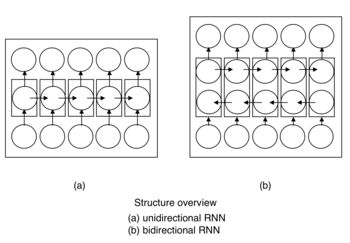

A *unidirectional RNN* is creating a representation of the first input, feeding it to the second and subsequently for every other input. From left to right. Whereas, a *bidirectional RNN* combines the representation from right to left as well as left to right. 

So, in essence, they are reading our sequences and creating a representation of features from left to right, and also creating a representation going the other way, from right to left. Using the last token as the input of the previous, etc.

That is the intuition behind *bidirectional RNNs*. Look for more resources to really understand them in detail.

Now let's use them...

In [107]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")   # one sequence of strings at a time; if we pass other data type it will raise an error
x = text_vectorizer(inputs)   # vectorize the words
x = embedding(x)  # create embedding layer
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)   # Bidirectional is a wrapper, we have to pass the type of RNN we want: could be LSTM, GRU...works for any RNN cell in TF. 
x = layers.Bidirectional(layers.LSTM(64))(x)                           # Again if we want to stack recurrent layers, use return_sequences=True on all of them except the last one
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [108]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [109]:
# As we use bidirectional layers of 64 units, it uses 128 units in total (64 each way)
# It creates a representation in both directions using the same number of units, so the total amount is 2 * # units defined in the layer
# That is the bidirectional wrapper, it doubles the value of hidden units specified to make the bidirectional representations

In [110]:
# Now that the model is built, then we just have to compile, fit and evaluate it!

In [111]:
# Compile the model
model_4.compile(loss="binary_crossentropy",   # binary problem
                optimizer="Adam",
                metrics=["accuracy"])

In [112]:
# Fit the model
# As we have double the amount of units, the model is expected to take more time!
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20221014-073320
Epoch 1/5
215/215 [==============================] - 7s 18ms/step - loss: 0.1033 - accuracy: 0.9691 - val_loss: 1.0555 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0542 - accuracy: 0.9783 - val_loss: 1.1196 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0448 - accuracy: 0.9787 - val_loss: 1.4172 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0457 - accuracy: 0.9799 - val_loss: 1.2826 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0389 - accuracy: 0.9822 - val_loss: 1.3551 - val_accuracy: 0.7743


In [113]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[6.5245485e-04],
       [6.5191793e-01],
       [9.9992359e-01],
       [2.6035976e-01],
       [4.2442254e-05],
       [9.9985111e-01],
       [9.4262326e-01],
       [9.9997556e-01],
       [9.9990833e-01],
       [9.8342395e-01]], dtype=float32)

In [114]:
# Convert pred probs into pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))   # get rid of dimension of shape 1 and round!
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [115]:
# Calculate the results of our bidirectional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.42782152230971,
 'precision': 0.7750846855676012,
 'recall': 0.7742782152230971,
 'f1': 0.7727127384591642}

In [116]:
# Boooh! Seems our bidirectional model has performed worse than all the unidirectional models!
# Adding bidirectionality seems to have provided worse results!
# So that is something important to keep in mind, not all experiments will succeed or improve the performance!
# But a failed experiment is also valuable, as we know what does not work! For example, for our data, seems a bidirectional model is not working so well!
# That is why we have to experiment, experiment and experiment!

### Summary of RNN models: Types of RNN cells

* LSTM (long short-term memory)
  * Use: Default RNN layer for sequence problems.
  * Learn more: https://colah.github.io/posts/2015-08-Understanding-LSTMs/ and https://youtu.be/QvkQ1B3FBqA 
  * Code: `tf.keras.layers.LSTM`

* GRU (gated recurrent unit)
  * Use: Performs very similar to LSTM (could be used as a default).
  * Learn more: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
  * Code: `tf.keras.layers.GRU`

* Bidirectional LSTM/GRU (goes forward and backwards on sequences)
  * Use: Good for sequences which may benefit from passing forward and backwards (e.g., machine translation or longer passages of text).
  * Learn more: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
  * Code: `tf.keras.layers.Bidirectional`

In [117]:
# So up to now, our DL models are not beating the baseline!
# Ofc, it is important to note that they are very simple and increasing the number of layers could help!
# That is something we could do, but we are going to create another model next, a 1D CNN!
# Let's go for it!

## Convolutional Neural Networks for Text (and other type of sequences)

We have used CNNS or Convolutional Neural Networks for images, but images are typically 2D (height x width)...however, our text data is 1D.

For that purpose, previusly we've used `Conv2D` for our image data, but now we are going to use `Conv1D`.

The typical structure of a Conv1D model for sequences(in our case, text; where 1D stands for 1 dimensional data; that is any sequence data):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Output (class probabilities)
```

So let's build the model...


### Model 5: Conv1D

TensorFlow documentation is amazing as it is really detailed and it also has tutorials. In the case of Conv1D layer, you can find info here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D.

For different explanations of parameters see:

* https://poloclub.github.io/cnn-explainer/ (this is for 2D but can relate to 1D data).
* Difference between "same" and "valid" padding: https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

Let's start building the model...

In [118]:
# Test out our embedding layer, Conv1D layer and max pooling (before we build the model)
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))  # turn target sequence into embedding

conv_1d = layers.Conv1D(filters=32,   # number of hidden units in the Conv1D layer
                        kernel_size=5,  # this is also referred as an ngram of 5 (meaning it looks at 5 words at a time)
                        strides=1,   # default value; reducing this would reduce the output as well, making larger hops when moving the kernels through the sentences!
                        activation="relu",
                        padding="valid")  # default = "valid", the output is smaller than the input shape, with "same", means output is same shape as input

conv_1d_output = conv_1d(embedding_test)  # pass test embedding through conv1d layer

max_pool = layers.GlobalMaxPool1D()    # We have to use also 1D version as the Conv layers is 1D, they have to match (we could use AveragePooling, but we are going to test here with MaxPooling)

max_pool_output = max_pool(conv_1d_output)   # equivalent to "get the most important feature" or "get the feature with highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [119]:
# So, what do we have here?
# Output from the embedding -> 1 sentence/sequence, 15 tokens (padded if shorter), and each token is encoded in a 128-dimensional feature vector
# Conv_1D output -> 32 refers to the number of filters/hidden units used, 11 comes from using valid padding as well as kernel size of 5. If we change it to same, this second dimensions would be 15 (keeping the dimensionality)
# Max_pool output -> max pool output condenses the value of all 15 tokens in one, which in this case is taking the maximum value of the 15 tokens (average would calculate the mean value), and converts it to one feature vector of 32
# So rather than having 32 per token, MaxPool, gives us 32 per entire sequence

Let's remind us what is going on with the CNN parameters there, check CNN explainer website: https://poloclub.github.io/cnn-explainer/

The concepts apply similarly to 1D data as it was for 2D data. In the example above, we have 32 kernels/filters going over the text. Then, the kernel size is how many words/tokens it looks at a time, in our case, 5 words at a time (this is directly related to the *ngram* concept, groups of 5 words checked at once). As stride is 1, it will slide over the filters one word at a time (to cover the next five, and so on). If we change stride to 2, means it will hop to tokens at a time to apply the filters to the next 5 words. Padding keeps or reduces the output size of the feature map/output. Using "same" we pad so we get all the tokens in the sequence (preserves all the data in the sequence). If "valid", some tokens at the end of the sequences may get missed from the sequence depending on the parameters used (see [THIS](https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t#:~:text=To%20sum%20up%2C%20'valid',same'%20padding%20means%20using%20padding) for some more discussion about the differences between "same" and "valid").

In [120]:
# We have checked the shapes, let's check how they look like
embedding_test  # test sentence passed through the embedding (it is randomly initialized as it did not have any training through a model yet)

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02199493, -0.02830989, -0.01977825, ...,  0.02245023,
         -0.10045967,  0.04813246],
        [ 0.02262844, -0.00968825, -0.00132409, ..., -0.01312245,
         -0.0326305 ,  0.0249098 ],
        [ 0.00086315, -0.02157342, -0.03048571, ..., -0.01518366,
         -0.02046958,  0.00207386],
        ...,
        [ 0.02062406,  0.02098388,  0.00775468, ...,  0.00308911,
         -0.02459974, -0.01757315],
        [ 0.02062406,  0.02098388,  0.00775468, ...,  0.00308911,
         -0.02459974, -0.01757315],
        [ 0.02062406,  0.02098388,  0.00775468, ...,  0.00308911,
         -0.02459974, -0.01757315]]], dtype=float32)>

In [121]:
conv_1d_output 

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.0000000e+00, 0.0000000e+00, 2.2962511e-02, 0.0000000e+00,
         2.1316908e-02, 4.8623145e-02, 5.7405420e-03, 7.7503468e-03,
         9.3955934e-02, 0.0000000e+00, 3.7216701e-02, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         6.4614162e-02, 4.2661533e-02, 3.0710297e-02, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 3.8266484e-02, 0.0000000e+00,
         0.0000000e+00, 3.7525438e-02, 9.4203681e-02, 0.0000000e+00,
         8.4326966e-03, 3.8464360e-02, 0.0000000e+00, 1.3409175e-02],
        [0.0000000e+00, 1.2562008e-02, 2.9134722e-03, 6.6027595e-03,
         1.9071221e-02, 0.0000000e+00, 5.7914123e-02, 3.3161670e-02,
         6.1907813e-02, 0.0000000e+00, 0.0000000e+00, 5.7568356e-02,
         5.7183966e-02, 0.0000000e+00, 0.0000000e+00, 1.7633017e-02,
         2.5971714e-02, 5.6785442e-02, 0.0000000e+00, 1.2893650e-01,
         0.0000000e+00, 1.2102926e-01, 0.0000000e

In [122]:
# This output has so many zeros as ReLU (the activation function used) squashes the negative values to zero and preserves the positive values

In [123]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.        , 0.06854361, 0.02296251, 0.04024664, 0.02131691,
        0.04862314, 0.12197079, 0.03316167, 0.09395593, 0.        ,
        0.0372167 , 0.05756836, 0.06920408, 0.        , 0.        ,
        0.02430188, 0.06878017, 0.11969426, 0.0307103 , 0.1289365 ,
        0.01354924, 0.12102926, 0.03826648, 0.05792981, 0.06978925,
        0.03752544, 0.09420368, 0.06700435, 0.0084327 , 0.03846436,
        0.07040939, 0.05337436]], dtype=float32)>

In [124]:
# As we can see the max_pool output performed its role of condense features; condense the previous large tensor into a single feature vector!
# It get rids of the middle dimension, taking the Max across all of the values within the dimension

Now that we have explored the building blocks of the Conv1D model, let's build it

In [125]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)   # one string sequence at a time
x = text_vectorizer(inputs)   # map inputs to integers
x = embedding(x)  # embed the integer form of our inputs
x = layers.Conv1D(filters=64, # 64 filters or kernels traversing our text data
                  kernel_size=5,  # each filter will look at 5 words at a time (5-gram)
                  strides=1, # default value; does one word hops when moving the filters, so sees all words
                  activation="relu",
                  padding="valid")(x)  # default value that reduces output shape
x = layers.GlobalMaxPool1D()(x)  # pooling layer that squeezes dimensionality 
# We could add another Dense layer here, for example, x = layers.Dense(64, activation="relu")(x) # but we are not going to add it as we want the simpler model possible
outputs = layers.Dense(1, activation="sigmoid")(x)  # binary classification

model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

In [126]:
# Compile the model
model_5.compile(loss="binary_crossentropy",  # binary classification
                optimizer="Adam",   # we could always use another one, but it is a good default!
                metrics=["accuracy"])

In [127]:
# Get summary of our Conv1D model
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 1)              

In [128]:
# Wonderful!
# We see the Conv1D layer, based on the padding = "valid" reduces the shape from 15 to 11. "Same" would have kept 15 as middle dimension.
# Also it compresses to 64, as we have 64 filters!

In [129]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20221014-073348
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1261 - accuracy: 0.9584 - val_loss: 0.9204 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0749 - accuracy: 0.9726 - val_loss: 1.0219 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0604 - accuracy: 0.9766 - val_loss: 1.1402 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0553 - accuracy: 0.9775 - val_loss: 1.1849 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0505 - accuracy: 0.9781 - val_loss: 1.2499 - val_accuracy: 0.7625


In [130]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[8.3277345e-02],
       [7.6537627e-01],
       [9.9993610e-01],
       [5.7966016e-02],
       [1.6587059e-07],
       [9.9483985e-01],
       [9.5480919e-01],
       [9.9995387e-01],
       [9.9999952e-01],
       [8.0413324e-01]], dtype=float32)

In [131]:
# Convert pred probs to pred labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))   # get rid of dimension of shape 1 and round values!
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [132]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 76.24671916010499,
 'precision': 0.7637525216162191,
 'recall': 0.7624671916010499,
 'f1': 0.7603795119224996}

In [133]:
# Buuuuhhh! This is our worse DL model yet!
# The baseline outscores the Conv1D model by five percent in all metrics!
# Ofc this model is very simple and we could upgrade it easily, but we are trying to keep them as simple as possible
# We could add layers, add more filters, etc. to upgrade our model and see if it improves!
# However, we are not going to do this...
# We are going to try the power of transfer learning for this problem!

Let's go and see how we can use transfer learning in Natural Language Processing!

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's [Universal Sentence Encoder](https://tfhub.dev/google/universal-sentence-encoder/4). 

See how the USE was created here: https://arxiv.org/abs/1803.11175


In the last few years, transfer learning has come to NLP problems. We are going to build a transfer learning model using TensorFlow Hub Pretrained Feature Extractor model.

More especifically, we are going to build a **USE (Universal Sentence Encoder) Feature Extractor** (https://tfhub.dev/google/universal-sentence-encoder/4), which will use a pretrained embedding (there are some available).

The architecture we are going to build now is as follows:

```
Input(s) -> Pretrained embedding Layer (USE from TF Hub)(preprocessed inputs, represented as a tensor) -> Dense layer(s) (outputs)
```
This can be also seen as (and that is how it is named in practice):
```
Input(s) -> Encoder (encodes sequences into numerical representation) -> Decoder (decodes the numerical representation of the sequences into desired output)
```
This encoder-decoder architecture is very common in NLP problems.

We can find pretrained embeddings in TF Hub. Much of these pretrained language models have been trained in Wikipedia (which is the equivalent of ImageNet for Computer Vision problems). If we go to https://tfhub.dev we can find many pretrained models. We can select there for text, and going down we find the one we are going to use (USE): https://tfhub.dev/google/collections/universal-sentence-encoder/1

There are many models pretrained for the USE (large, lite (for mobile devices and restricted resources use cases), etc.). We are going to use the vanilla version: https://tfhub.dev/google/universal-sentence-encoder/4

More about the embedding generation in the related paper: [Universal Sentence Encoder](https://arxiv.org/abs/1803.11175)

Other options for embedding models are there, we may use and try them to find the best one that suits our problem!

Besides, another relevant NLP library is huggingface transformers (which is out of the scope of this course). Transformers are type of sequence model that can be used in many different things. More here: https://huggingface.co/docs/transformers/index 

**HUGGINGFACE is another great resource alongisde TensorFlow Hub for finding pretrained models for a lot of different tasks.** (Explore it and learn to use it as it is very powerful library/resource!)

For more about embeddings: https://www.tensorflow.org/text/guide/word_embeddings

In [134]:
# Let's download the pretrained embedding model and use it
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")   # load pretrained model
embed_samples = embed([     # using the embedding model to embed sample sentences
    sample_sentence,  # "There's a flood in my street!" sample sentence defined before
    "Amazingly using the universal sentence encoder here, which turns a sentence into numbers"
])
print(embed_samples[0][:50])   # only the first 50 elements of the embedding of the first sample sentence

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [135]:
# This is the output of the first sentence passing through the USE encoder, the first 50 numbers (it is encoded in 512)
# So it turned our sentence into a numerical representation

In [136]:
# If we look at both samples
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157028,  0.0248591 ,  0.02878048, ..., -0.00186124,
         0.02315826, -0.01485021],
       [-0.00261993, -0.08174949, -0.06157366, ..., -0.00477651,
         0.03261207,  0.01194491]], dtype=float32)>

In [137]:
# We have shape 2 and 512, so we have two sentences encoded in 512-dimensional vectors
# So the USE transforms the whole sentence into one feature vector of size 512
embed_samples[0].shape

TensorShape([512])

In [138]:
# So we are using all the pretrained weights the USE has learned, and passing it through our own sample
# sentence. It encodes it into some numerical format of size 512!

What can we do with this? How about we use this pretrained model as an embedding layer in our model? (sentence **encoder**). How can integrate the embedding as a layer into our model? Let's see it next...

And then build some kind of dense layer on top of it to output our desired output format (**decoder**).

So that is the plan, let's build it!



In [139]:
# Create a Keras layer using the USE pretrained embedding from TensorFlow Hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",  # it will create a Keras layer using the embedding from the URL
                                        input_shape=[], # we left the input shape as it can be of variable length (that is said in the documentation of the embedding in TFHub)
                                        dtype=tf.string,  # input data type
                                        trainable=False,  # we do not want to train it; as we want to use it as a feature extractor!! No fine-tuning yet! Weights/patterns are frozen!
                                        name="USE",
                                        )  # the output will be always a 512 dimensional feature vector, no matter the length of the input (which were limited for us in the previous models we built!)

In [140]:
# Create model using the Sequential API (as we want to put the layer as one in 
# our model and an output layer on top)

model_6 = tf.keras.Sequential([
    sentence_encoder_layer,   # we do not need any other vectorization layer, this handles all for us from string to embedding; this is one of the benefits of TFHub models, they handle a lot of preprocessing steps for us
    layers.Dense(1, activation="sigmoid", name="output_layer")  # output layer, so the output of the embedding comes directly as input to the output layer
], name="model_6_USE")

In [141]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [142]:
# Model 6 summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 output_layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [143]:
# As weights in the embedding are frozen, the trainable params are only the output layer's weights! 

In [144]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20221014-073417
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.6481 - accuracy: 0.7362 - val_loss: 0.6119 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.5815 - accuracy: 0.7914 - val_loss: 0.5635 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.5386 - accuracy: 0.7965 - val_loss: 0.5313 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.5097 - accuracy: 0.7992 - val_loss: 0.5100 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4895 - accuracy: 0.8015 - val_loss: 0.4953 - val_accuracy: 0.7848


In [145]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.35825172],
       [0.68050724],
       [0.8530547 ],
       [0.362144  ],
       [0.6286386 ],
       [0.7501088 ],
       [0.82618564],
       [0.8377228 ],
       [0.7549382 ],
       [0.20094338]], dtype=float32)

In [146]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))   # remove single dimension and round values!
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [147]:
# Now we can compare preds and ground truth, and calculate the results
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 78.4776902887139,
 'precision': 0.7850830699961587,
 'recall': 0.7847769028871391,
 'f1': 0.7836921773929648}

In [148]:
# Almost! But we still did not beat our baseline model! But this model looks the most promising so far!
# Let's do a small tweak and add a dense layer before the output layer!

#### Improving model 6: adding a Dense layer!

Adding a Dense layer before the output on model 6, to see if it beats the baseline model!

In [149]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,   # we do not need any other vectorization layer, this handles all for us from string to embedding; this is one of the benefits of TFHub models, they handle a lot of preprocessing steps for us
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")  # output layer, so the output of the embedding comes directly as input to the output layer
], name="model_6_USE_2")

In [150]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [151]:
# Model 6 summary
model_6.summary()

Model: "model_6_USE_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [152]:
# With this additional layer we have added over 32000 trainable parameters!

In [153]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_2")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_2/20221014-073433
Epoch 1/5
215/215 [==============================] - 4s 13ms/step - loss: 0.5096 - accuracy: 0.7792 - val_loss: 0.4472 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4133 - accuracy: 0.8155 - val_loss: 0.4382 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4012 - accuracy: 0.8215 - val_loss: 0.4306 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3918 - accuracy: 0.8275 - val_loss: 0.4349 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3851 - accuracy: 0.8282 - val_loss: 0.4252 - val_accuracy: 0.8228


In [154]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.1638338 ],
       [0.7775289 ],
       [0.99041665],
       [0.18060763],
       [0.73918414],
       [0.70959336],
       [0.9875695 ],
       [0.9801601 ],
       [0.94707596],
       [0.091952  ]], dtype=float32)

In [155]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))   # remove single dimension and round values!
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [156]:
# Now we can compare preds and ground truth, and calculate the results
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 82.28346456692913,
 'precision': 0.8250036710833346,
 'recall': 0.8228346456692913,
 'f1': 0.8214691656326627}

In [157]:
# Yeyeeeh!! We finally beat the baseline, the first DL model that beats the baseline model!
# This demonstrates the power of Transfer Learning, it enables us to beat the baseline for the first time!
# And the power of making a simple adjustment to the model that can improve them significantly!
# But...

**What model adjustment should you make?** There are several ways you can improve a model!

Let's have a reminder!

### Improving a model

Common ways to improve a deep learning model (hyperparameter tuning):

* Adding layers (as we did in the previous example to beat the baseline!)
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

(They are hyperparameters as we can alter them). We leave these improvements for later experimentation.

The main driver of the improvement here is this pretrained embedded model (USE), that is, the usage of transfer learning. 

We fit our model with 100% of the data. However, we mentioned before that **the power of Transfer Learning is being able to get great results with less data**.

We fit the model with close to 7000 sentences. How about fitting it with 10% of it, that is, 700 sentences?

In practice, for our own problems, it is not uncommon to not have much data, usually projects have a smaller amount of data than the publicly available datasets. So, let's build the same model, using transfer learning, with only 10% of the training data.

Let's do it!

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you do not have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

Besides, you should get used to experiment with smaller datasets as:

1. You will be able to experiment quicker, as the training/fitting on the data will be faster.
2. In practice, when you start to get work on datasets that are not ready for you to go, they will often be a lot smaller than the ones that you can find online ready to go.

In [158]:
# (NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% of the data, outperforms model_6 trained on 100% ))
# DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SETS

# Create subset of 10% of the training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)  # get just text and target columns and randomly select 10% of the data
train_10_percent.head(), len(train_10_percent)

(                                                   text  target
 4955  DFR EP016 Monthly Meltdown - On Dnbheaven 2015...       0
 584   FedEx no longer to transport bioterror germs i...       0
 7411  Gunmen kill four in El Salvador bus attack: Su...       1
 5950  @camilacabello97 Internally and externally scr...       1
 5541  Radiation emergency #preparedness starts with ...       1, 761)

In [159]:
# Now we separate text and label
train_sentences_10_percent = train_10_percent["text"].to_list()   # a Pandas series is not good to our models, so convert to list!
train_labels_10_percent = train_10_percent["target"].to_list()

In [160]:
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [161]:
# Perfect! We just sampled 10% of the original training data and prepared it for the model!

In [162]:
# Check the number of targets in pur subset of data
# We want the split to be representative of the overall dataset (not biased, or too imbalanced with respect to the original data)
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [163]:
# Original dataset ratio
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [164]:
# The ratio of the original data is about 60-40, and the sampled dataset is roughly similar!
# It is not the exact same ratio, but it is very close! So good!
# If the proportions would be too different from the original label distribution, the 10% sample would
# not be not representative of the original training set!
# Making a split of the dataset, you must ensure that the split/sample is from the same distribution! That is, that it
# follows the same frequency distribution as the original/main dataset one!
# That is very important for running ML experiments. Subsets must be representative from the sets they are taken from!

# Let's build a model, the same as model_6 but fit with 10% of the training data

To recreate a model the same as a previous model you have created you can use the `tf.keras.models.clone_model` method. See more here: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

This method will clone an existing model but reset all the patterns that the model has learned. So when we train it, it will be like training the model from a fresh.

In [165]:
# Let's build a model the same as model_6
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be the same as model_6)
model_7.summary()

Model: "model_6_USE_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [166]:
# As in model_6; the USE layer has its patterns/weight frozen
# The only trainable are the dense and output layer! Cool!
# However, as we want to rename it to track better the experiment, we are going to redefine the model
# as the clone_model() does not allow the name parameter to rename the model, but this is how to clone a model if we want to!

As clone_model() method does not allow us to rename the model. We are going to reinstantiate model_6 and rename it! In that way, we can rename it!

In [167]:
# Let's build a model the same as model_6 (without clone)
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,  
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")  
], name="model_7_USE_10_percent")  # we cannot add this to clone_model!

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be the same as model_6)
model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [168]:
# Fit the model to the 10% training data subset
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20221014-073452
Epoch 1/5
24/24 [==============================] - 3s 41ms/step - loss: 0.6727 - accuracy: 0.6715 - val_loss: 0.6361 - val_accuracy: 0.7940
Epoch 2/5
24/24 [==============================] - 0s 21ms/step - loss: 0.6026 - accuracy: 0.7898 - val_loss: 0.5574 - val_accuracy: 0.8058
Epoch 3/5
24/24 [==============================] - 1s 24ms/step - loss: 0.5267 - accuracy: 0.7976 - val_loss: 0.4882 - val_accuracy: 0.8084
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4703 - accuracy: 0.8068 - val_loss: 0.4417 - val_accuracy: 0.8176
Epoch 5/5
24/24 [==============================] - 0s 21ms/step - loss: 0.4325 - accuracy: 0.8173 - val_loss: 0.4116 - val_accuracy: 0.8228


In [169]:
# Wow! Looks better initially than the 100% data model (model_6), let's check it

In [170]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.25943422],
       [0.8038623 ],
       [0.9116878 ],
       [0.32119137],
       [0.79811823],
       [0.82089174],
       [0.90320915],
       [0.9373827 ],
       [0.83544177],
       [0.07928275]], dtype=float32)

In [171]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))  # get rid of the singular dimension and round values (above 0.5 to 1, below 0.5 to 0)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [172]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 82.28346456692913,
 'precision': 0.8226847286369606,
 'recall': 0.8228346456692913,
 'f1': 0.8225178840595894}

In [173]:
# Awesome, these results are higher than those with the model trained on the full data! (below)
model_6_results

{'accuracy': 82.28346456692913,
 'precision': 0.8250036710833346,
 'recall': 0.8228346456692913,
 'f1': 0.8214691656326627}

In [174]:
# This is very strange! Why that might be? It may happen, but it is too rare, we have to check for issues!
# This is a warning signal that something is going on, it is not normal that a model trained with less 
# data outperforms so much (almost 2% in F1) a model trained with almost an order of magnitude more of data

In [175]:
# There is a gut feeling that something might be wrong here...
# What is going on? How can we troubletshoot this? Let's explore it next!

In [176]:
# The gut feeling is that there might be wrong with the data! Let's check it!

### IMPORTANT ISSUE: DATA LEAKAGE

The new split (sample with 10% of the data) was created from `train_df_shuffled`, which, at the same time, was used to create the `train_sentences` and `val_sentences` datasets. As the model is validated on `val_sentences` we might have included in the 10% sampled dataset, data samples that are also included in `val_sentences`, chosen at random. That creates **DATA LEAKAGE** and artificial and inflated performance metrics for `model_7`! 

In summary, `model_7`is trained with data that might also exist in the validation dataset and that is completely wrong, the datasets are not disjoint (they might have several elements in common), creating **DATA LEAKAGE** and inflated and false performance. Some of the validation data is also inside the trainig dataset. That is the wrong point. Even though it might be a small amount, it is a data leakage problem and must be solved. It is a very subtle issue, but that is why you have to pay so much attention on how you create your data splits. This is not applicable for `model_6` which has been trained in to randomly split and disjoint datasets (no element in commmon). 

**Data leakage** is very subtle, we must pay a lot of attention on how we create our models, and prevent or solve it immediately. It gaves us a false sense that our model is doing better than what it may actually be doing. Why? Because part of the validation data is included in the training set, so the model has already seen and knows about some of the samples it has to make predictions! That is unfair advantage, the model already knows the label for those samples, so it is ofc, more likely to be correct on that one! It is like cheating on a test, knowing the question/answer beforehand.

**So how do we fix this data leakage?** Easy. We generate the 10% subset from the training dataset, which does not include any sample from the validation set (as train_df_shuffled does). **In this way, we ensure the datasets are still disjoint (no common samples in them) and there is no data leakage**.

This is something very subtle that you can come across in practice. You have to be very, very skeptical if you try a model on less data and it gets better results, especially if you are using the exact same model architecture.

In [177]:
# Let's fix the issue
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))  # get the # samples that corresponds 10% of the data
train_sentences_10_percent = train_sentences[:train_10_percent_split]   # get first 10% samples from original training set, they are already in random order as the train/val splits were created at random!
train_labels_10_percent = train_labels[:train_10_percent_split]  # as above, they are already in random order!
len(train_sentences_10_percent), len(train_labels_10_percent)  # already randomly chosen 10% of samples!

(685, 685)

In [178]:
# Let's view 10 of them
train_sentences_10_percent[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [179]:
# Check the labels
train_labels_10_percent[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [180]:
# Check the number of each label in the updated training data subset
pd.Series(train_labels_10_percent).value_counts()

0    406
1    279
dtype: int64

In [181]:
# Ok, we have got a few zeroes more than we got ones, but the ratio is not too far off
# We could make it a little bit better but as it is more or less 10% of each label, we are goint to take that
train_df_shuffled["target"].value_counts()   # original training dataset label distribution

0    4342
1    3271
Name: target, dtype: int64

In [182]:
# Now we have a dataset with no data leakage issue, let's run the experiment of model_7 again (with this data)!

In [183]:
# Let's build a model the same as model_6 (without clone)
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,  
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")  
], name="model_7_USE_10_percent")  # we cannot add this to clone_model!

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be the same as model_6)
model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [184]:
# Fit the model to the 10% training data subset
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20221014-073458
Epoch 1/5
22/22 [==============================] - 2s 42ms/step - loss: 0.6609 - accuracy: 0.7197 - val_loss: 0.6415 - val_accuracy: 0.7467
Epoch 2/5
22/22 [==============================] - 0s 22ms/step - loss: 0.5893 - accuracy: 0.8058 - val_loss: 0.5849 - val_accuracy: 0.7638
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5184 - accuracy: 0.8175 - val_loss: 0.5348 - val_accuracy: 0.7861
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4601 - accuracy: 0.8190 - val_loss: 0.5041 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4199 - accuracy: 0.8394 - val_loss: 0.4877 - val_accuracy: 0.7848


In [185]:
# Ideally this should not go as well as the previous, so that is perfectly expected, no problem!

In [186]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.21431886],
       [0.5990243 ],
       [0.90224224],
       [0.36523315],
       [0.5968075 ],
       [0.6689778 ],
       [0.879847  ],
       [0.806323  ],
       [0.83188313],
       [0.15372925]], dtype=float32)

In [187]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))  # get rid of the singular dimension and round values (above 0.5 to 1, below 0.5 to 0)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [188]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 78.4776902887139,
 'precision': 0.7852333934786505,
 'recall': 0.7847769028871391,
 'f1': 0.7835949548054881}

In [189]:
# So performing slightly worse than model_6. However this is only with 10% of the data!
# So this just goes to show the power of transfer learning, so that is something to be very aware of is

**IMPORTANT NOTE!**: Be **very careful when creating training/val/test splits** that you do not leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (e.g., a model trained on 10% of the data outperforming the same model trained on 100% of data), trust your gut and go back through to find where the error may lie. **Be very careful when you make training data splits**!.

In [190]:
# We have concluded all the planned experiments, so what do we do now?
# Compare them!

## Comparing the performance of each of our models

In [191]:
# As we created this very handy function that returns a dictionary for every model; and all the dicts are the same
# We can leverage the power of Pandas to create a table displaying the data!

In [192]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})

all_model_results

,0_baseline,1_simple_dense,2_lstm,3_gru,4_bidirectional,5_conv1d,6_tf_hub_use_encoder,7_tf_hub_use_encoder_10_percent
accuracy,79.265092,77.952756,77.690289,76.509186,77.427822,76.246719,82.283465,78.477690
precision,0.811139,0.781115,0.782224,0.765325,0.775085,0.763753,0.825004,0.785233
recall,0.792651,0.779528,0.776903,0.765092,0.774278,0.762467,0.822835,0.784777
f1,0.786219,0.777651,0.773452,0.763747,0.772713,0.760380,0.821469,0.783595


In [193]:
# Oh! Awesome! But might be better transposed, let's transpose it!
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,77.952756,0.781115,0.779528,0.777651
2_lstm,77.690289,0.782224,0.776903,0.773452
3_gru,76.509186,0.765325,0.765092,0.763747
4_bidirectional,77.427822,0.775085,0.774278,0.772713
5_conv1d,76.246719,0.763753,0.762467,0.760380
6_tf_hub_use_encoder,82.283465,0.825004,0.822835,0.821469
7_tf_hub_use_encoder_10_percent,78.477690,0.785233,0.784777,0.783595


In [194]:
# Much, much better now! How cool is this!
# We can compare all models this way! #6 is the best one, beating the baseline (which is very close on precision)
# F1 is probably the best measure here to compare! (combines precision and recall)

In [195]:
# This looks good but, how can we make this more visual?
# Sure we can, but first...

In [196]:
# Reduce accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"] / 100

In [197]:
# Let's see it now...
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.779528,0.781115,0.779528,0.777651
2_lstm,0.776903,0.782224,0.776903,0.773452
3_gru,0.765092,0.765325,0.765092,0.763747
4_bidirectional,0.774278,0.775085,0.774278,0.772713
5_conv1d,0.762467,0.763753,0.762467,0.760380
6_tf_hub_use_encoder,0.822835,0.825004,0.822835,0.821469
7_tf_hub_use_encoder_10_percent,0.784777,0.785233,0.784777,0.783595


In [198]:
# Great all in the same scale!
# Let's now plot it!

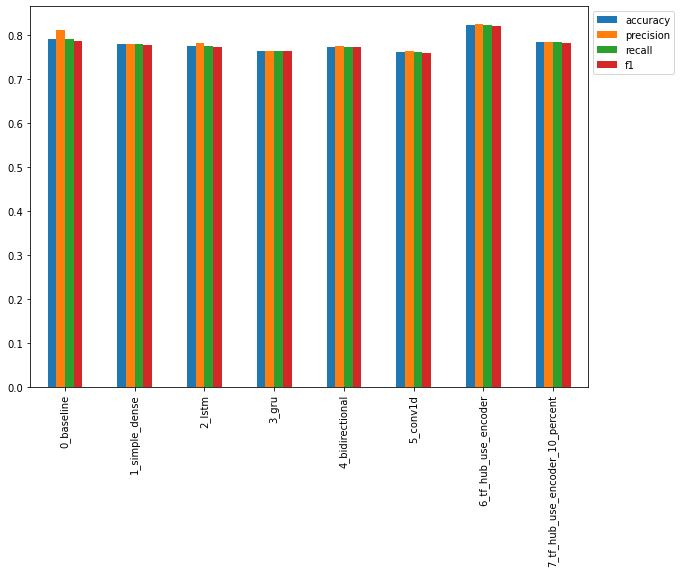

In [199]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));
# Creating bars and putting the legend out of the graph!

In [200]:
# So baseline outperforms all of them except when model_6 arrives! Cool!
# Model_7 is on par on baseline and outperforms all the other DL approaches except model_6
# This visual way is also helpful to spot issues with models/data (always be skeptical about too good models or large performance gaps among models)

In [201]:
# All models are pretty close, which tells us that there may be a limit to how learnable the patterns in our data are!
# If a lot of models are performing very similar on the same data, there might be some inherent level of like a max performance
# level. So we will use our best model later on to find the most wrong predictions (the model predicted wrong with a high level of probability)
# Analyzing this errors gives us a way to further explore our data

In [202]:
# Let's keep going now, let's extract the F1 metric in all of this...
# F1 is a very good performance metric for balanced and imbalanced classification problem (accuracy it is not for imbalanced!)

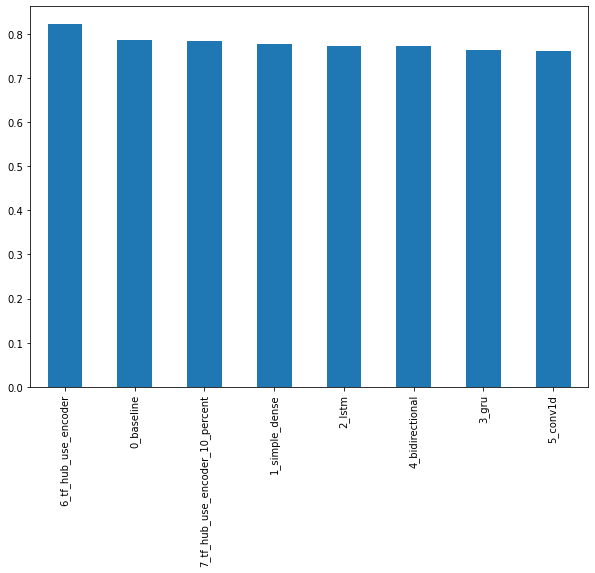

In [203]:
# Sort model results by F1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

In [204]:
# We are only plotting F1 scores, we see that the baseline model is very close to the best model
# The 10% model performs very close to baseline as well, and outperforms all the other deep models
# That is an evidence of the power of Transfer Learning!
# But remember the baseline was not using deep learning! Even though we have the power of DL, TF,...
# They might not be necessarily the best approaches for the job. Traditional ML can do the work as good or even better!
# That is why it is important to ALWAYS START WITH A BASELINE!
# Possible addition: If we add value labels on top of that, the graph might look even better!

In [205]:
# How can we further compare our models? Using TensorBoard, we can compare the learning curves!
# Even though this will not plot the baseline (as we do not have that information for it), it will enable us
# to compare visually all the deep learning approaches learning curves! Let's go for it!

## Uploading our model training logs to TensorBoard.dev
We can further inspect our model's performance using TensorBoard.dev: https://tensorboard.dev/

In [ ]:
# View TensorBoard logs of transfer learning modelling experiments (plus all of our other models)
# Upload TensorBoard dev records  (there are good examples/tutorials/documentation on TensorFlow/TensorBoard webpage)
# We can use TensorBoard directly here as it is installed in Collab, in a local machine we should install it first
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Experiments ZTM TF Course Video" \
  --description "Comparing multiple different types of model architectures on the Kaggle tweets text classification dataset" \
  --one_shot  # exit the uploader once uplading is finished

Now I've run the cell above, my modelling experiments are visible on TensorBoard.dev: https://tensorboard.dev/experiment/9auP2iAOTW2S7DwlWbxiyw/

In [207]:
# There we can select what curves to plot (as there are many)
# In our case, the most interesting ones would be all transfer learning curves (tf_sentence_encoder with 100% and 10%, and one
# with the extra dense layer) and also the bidirectional RNN on validation dataset (we could select other metrics/models according 
# to our interests). We can see easily what was the performance of the model, the curve starting from initial epoch (0) to the
# final epoch (4 in this case), so we trained for 5 epochs all models!
# So we can easily compare the models this way (e.g., 10% transfer learning performed better than the bidirectional model and the best
# model is the one using 100% data and Dense layer included doing transfer learning, that is, using the universal sentence encoder).
# If we check the loss, we see the bidirectional model loss starting to go up, which hints that the model was overfitting! The other
# curves go down, as expected from learning. So another experiment would be to train for longer (and see if they continue going down) or
# fine tune them! There are many extensions here that we could explore to our models! But we are not going to deal with them now!

In [208]:
# Let's remind us some useful commands for TensorBoard...

In [209]:
# See the previous TensorBoard dev experiments you have run...
#!tensorboard dev list

In [210]:
# If you need to delete an experiment from TensorBoard, you can run the following:
# !tensorboard dev delete --experiment_id 2XSxVjY7SK6S4qlqRYWPfw

Check **Weights & Biases** (wandb.ai) which is a very powerful and useful tool to visualize and track a whole bunch of ML experiments. The W&B API links directly with all of the TensorBoard model logs that we have saved!

TensorBoard is good, but Weights & Biases is awesome! Much more complete and interactive, as it a tool done with the purpose of tracking ML experiments!

**Resources note**: TensorBoard is great for quickly tracking experiments, but for larger scale experiments and a whole bunch more tracking options, check out Weights & Biases: https://wandb.ai

Let's continue with saving and loading the best model of our experiments...

## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:
1. The `HDF5` format (most compatible with other tools not related to TF).
2. The `SavedModed` format (this is the default when using TensorFlow).

In [211]:
# Our best performance model was model_6
model_6_results

{'accuracy': 82.28346456692913,
 'precision': 0.8250036710833346,
 'recall': 0.8228346456692913,
 'f1': 0.8214691656326627}

In [212]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")   # we just save it in this format adding .h5 to the filename, that's it!

In [213]:
# Load model with custom Hub Layer (required with HDF5 format) - IMPORTANT!
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})   # how we provide the custom object from TF Hub! We tell the model how and what was the custom object!

In [214]:
# This version of USE encoder is quite heavy, which may prevent your model to be used in some applications
# You can always use lighter versions, check TF Hub for it (if there are; for the USE case there was a lite versio)
# How does our loades model perform? To ensure it has loaded correctly
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4252 - accuracy: 0.8228


[0.42522168159484863, 0.8228346705436707]

In [215]:
# Should perform very close to
model_6_results

{'accuracy': 82.28346456692913,
 'precision': 0.8250036710833346,
 'recall': 0.8228346456692913,
 'f1': 0.8214691656326627}

In [216]:
# Yeah, that's it! Very similar values, differences basically due to precision storage! Perfect!
# So the model was saved and loaded correctly!

How about save and load in `SavedModel` format?

Amazing documentation here: https://www.tensorflow.org/tutorials/keras/save_and_load

In [217]:
# Save TF Hub Sentence Encoder model to SavedModel format (default in TF)
model_6.save("model_6_SavedModel_format")   # no extension, so it saves the model in default format = SavedModel

In [218]:
# Load in a model from the SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [219]:
# The good point is that we do not have to pass in the custom objects of the model
# As SavedModel saves many things from the model, as much as possible, in a folder (HDF5 is actually just a file)
# So depending on the application, you might be interested in one format or the other!

In [220]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4252 - accuracy: 0.8228


[0.42522168159484863, 0.8228346705436707]

In [221]:
# Awesome! That is it! Saved and loaded perfectly!
# Now we can download from Colab and use them anywhere!
# To download files from Colab use...
# from google.colab import files
# files.download('example.txt') 

# Let's evaluate our models performance in a different and interesting way: finding most wrong predictions!
# It is a visual way to evaluate the model, apart from all the performance metrics we can retrieve (numeric)

## Finding the most wrong examples

* If our best model still is not perfect, what examples is it getting wrong?
* And of these wrong examples, which ones is it getting *most* wrong (those with prediction probbilities closest to the opposite class). 

As we are using the sigmoid function, that means a sample should have a label of 0 (so prediction probability of the model should be below 0.5), but our model predicts a prediction probability of 0.999 (really close to 1, so rounded to 1), and vice versa. 

This is technically called as **Model Driven Data Exploration**, as we are using our trained model to help us find out more about our data (also referred to as active learning). So basically using a trained model to help you out rather than you just looking at random samples.

In [222]:
# To have the same results (wrong examples) as the instructor, let's use an already generated model (instead of the one trained here)
# Download and unzip a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip   # we could also use unzip_data("08_model_6_USE_feature_extractor.zip")

--2022-10-14 07:36:07--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.250.65.80, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  82.3MB/s    in 15s     

2022-10-14 07:36:23 (60.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [223]:
# The downloaded model is in SavedModel format
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")

In [224]:
# Check if all is good by evaluating the model and comparing what it should be if saved properly
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [225]:
# Good, that it is in the range of the expected performance!

In [226]:
# Make predictions with the loaded model from GS and convert them into labels
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]  # these should be in label format

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [227]:
# Create a DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                      "target": val_labels,
                      "pred": model_6_pretrained_preds,
                      "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})  # tf.squeeze to transform 762x1 shape into a vector of 762 dimensions; get rid of the extra 1 dimension

val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [228]:
# Cool table!
# How we can select now the "most wrong" predictions?

In [229]:
# Find the wrong predictions and sort by prediction probability
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)  # selecting just the wrong predictions and sorting by pred prob in descending order!
most_wrong

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
...,...,...,...,...
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949


Let's remind ourselves of the target labels...
* `0` = not disaster
* `1` = disaster

In [230]:
# So the most wrong values are at the very beginning and very end of the DataFrame!
# We are actually analyzing FN and FP values with the larger prediction probabilities in either side!
# To get FP we can check the beginning of the DataFrame...
most_wrong.head(10)

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [231]:
# Whereas for the FN we can check the very end of the DataFrame...
most_wrong.tail(10)

,text,target,pred,pred_prob
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.067303
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.055076
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.054603
221,going to redo my nails and watch behind the sc...,1,0.0,0.054597
59,You can never escape me. Bullets don't harm me...,1,0.0,0.049637
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


* **False Negative** = the model predicts the negative class, when the sample actually belonging to the positive class. We retrieve them in this case by issuing `.tail()`.
* **False Positive** = the model predicts the positive class, when the sample is actually belonging to the negative class. We get them in this case by issuing `.head()`.

In [232]:
# Check the False Positives (model predicted 1 when should have been 0)
for row in most_wrong[:10].itertuples():  # retrieving all the rows in tuple format
  _ , text, target, pred, pred_prob = row  # unpacking the tuple content, we do not care about index (first value)
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272132277488708
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [233]:
# Awesome way of visualization! We can now inspect if the mistakes might be understandable, 
# if there might be wrong labelled (ground-truth) samples (so our model is actually correct and we 
# should update the label in the dataset and retrain the model), etc.
# If we can do that for multiple samples, it can potentially improve our models results because we are increasing
# the data quality (wrong labelled samples) and the learning process will be better!
# This is a very interesting and useful way to inspect the model performance!

In [234]:
# Let's visualize now the False Negatives (model predicted 0 when should have been 1)
for row in most_wrong[-10:].itertuples():  # retrieving all the rows in tuple format
  _ , text, target, pred, pred_prob = row  # unpacking the tuple content, we do not care about index (first value)
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05507579818367958
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.05459698289632797
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.0

In [235]:
# We have now made predictions on the validation data set
# However, we still have, and still never used, the TEST SET!
# Let's make some predictions on it and display it as before (we will not have target labels though)!

## Making predictions on the test dataset

In [236]:
# Getting the samples and putting them into list format
test_sentences = test_df["text"].to_list()
test_sentences[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [237]:
# Let's pick 10 random instances, predict and visualize them at once
test_samples = random.sample(test_sentences, 10)  # select 10 random instances each time

for test_sample in test_samples:  # loop throughm the selected samples predict and visualize!
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)  # transform prediction into 0/1
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.10158633440732956
Text:
I'm all in favor of keeping dangerous weapons out of the hands of fools. Let's start with typewriters.

-----

1/1 [==============================] - 0s 33ms/step
Pred: 0, Prob: 0.06212920695543289
Text:
If blizzard did another 12 month sub thing and gave the next wow expo free would probaly knock their sub count up pretty fucking high

-----

1/1 [==============================] - 0s 29ms/step
Pred: 0, Prob: 0.11031261086463928
Text:
Drowning doesn't sound half bad rn

-----

1/1 [==============================] - 0s 29ms/step
Pred: 0, Prob: 0.05009758099913597
Text:
Just blew you up @abbss_13 just so I can get that follow back ????

-----

1/1 [==============================] - 0s 32ms/step
Pred: 0, Prob: 0.3899674117565155
Text:
@CHold ironically RSL call their stadium the Riot

-----

1/1 [==============================] - 0s 28ms/step
Pred: 1, Prob: 0.9749070405960083
Text:
@RoxYunkFalls A

In [238]:
# You could select each time 10 random samples or you could turn them all into a DataFrame and make
# prediction on all the test dataset and visualize them in one hit!
# So this a way to predict and visualize the data at the same time, as we do not have target labels here,
# it depends on us to assess if the model is correct or not in the predictions made!

## Your challenge...predicting on Tweets from the wild

Go to your favorite Twitter account and copy one of their latest Tweets. 

Then pass that Tweet through our trained model.

Is that Tweet a disaster or not disaster (according to the model)? Is the model right or wrong?

In [239]:
# Retrieving a tweet from the wild
wildTweet = "BREAKING Europe. #Bitcoin is the ultimate freedom, the ultimate liberty. — Nigel Farage"

In [240]:
# Predicting using our model
pred_prob = tf.squeeze(model_6_pretrained.predict([wildTweet])) # our model expects a list as input
pred = tf.round(pred_prob)  # transform prediction into 0/1
print(f"Pred: {int(pred)}, Prob: {pred_prob}")
print(f"Text:\n{wildTweet}\n")
print("-----\n")

1/1 [==============================] - 0s 30ms/step
Pred: 0, Prob: 0.10303504765033722
Text:
BREAKING Europe. #Bitcoin is the ultimate freedom, the ultimate liberty. — Nigel Farage

-----



In [241]:
# Cool! That is a perfect prediction! That tweet does not involve (fortunately) a disaster!

## The speed/score tradeoff

In practice, it is important not only the accuracy of the model but also the speed of the prediction. 

Let's imagine you have a high accuracy model that can process much less data than other, as it takes a lot of time to make the prediction. The lighter model is less accurate but makes and handles data much faster (being able to handle much more data). 

The main issue here is: is that worth it to trade off a little bit of performance for a much faster model? 

We are going to compare our models' performance versus how fast they make a prediction. This is something very relevant in real setups, where a ML model is implemented as a service and hast to perform both at a certain level of performance and also at a certain level of speed. 

You caould build the largest, greatest, deepest model performing at 95/99% accuracy, but if it takes a whole minute to make a prediction, is that really feasible if you are predicting on something that needs fast results? 


In [242]:
# Let's make a function to measure the time of prediction
import time

def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter()  # get start time
  model.predict(samples)  # make predictions
  end_time = time.perf_counter()   # get finish time

  total_time = end_time - start_time  # calculate how long predictions took to make

  time_per_pred = total_time / len(samples)

  return total_time, time_per_pred

In [243]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 11ms/step


(0.32559964500001115, 0.0004272961220472587)

In [244]:
# So below a second on all samples, and seems very fast for individual samples

In [245]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.01984274699998423, 2.604035039368009e-05)

In [246]:
# Wohoooo, over 10 times less time on the whole amount of samples, and also on individual samples

In [247]:
# This is on Google Colab hardware as well, that must be taken into account, the hardware where we
# evaluate inference time (i.e., prediction time)
# INFERENCE == PREDICTION
# Let's continue the comparison...

In [248]:
# Get results for pretrained GS model
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

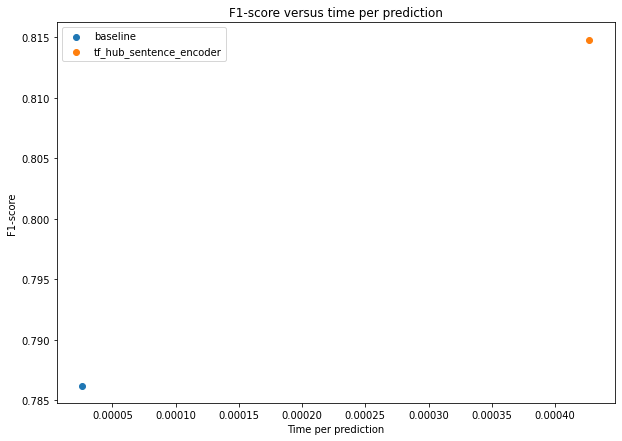

In [249]:
# Let's compare our models time per prediction versus the particular models F1 score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");

In [250]:
# Baseline is very fast making predictions, whereas tf_hub_sentence_encoder has a higher F1 score but is
# much slower making predictions. 
# So this is something to think about when you implement your models...
# Is the extra boost in performance of the tf_hub_sentence_encoder (about 3% more F1 score) worth taking
# 10 times longer to predict for every single instance?
# This time depends ofc on the hardware used, but is evident that the baseline model is much faster making predictions
# than the DL model. 
# Maybe making more predictions at a slightly worse rate is better for you; or not, maybe you do not worry about how long a prediction
# takes, but care more about the accuracy of the predictions, provide the best possible results!

### Ideal speed/performance trade off

The ideal speed/performance would be obtaining high performance + high speed (top left corner of previous plot). Is this achievable? It could be but it would take a lot of experimenting to get to that point. But that is something to keep in mind when you end up building ML powered applications.



Well done! This is the end of this notebook, we have just finished the intro to NLP using TensorFlow! Awesome!

Time to recap and to some [Extra-Curriculum and Exercises](https://github.com/mrdbourke/tensorflow-deep-learning#-08-introduction-to-nlp-natural-language-processing-in-tensorflow-exercises)!